In [133]:
import numpy as np
import pandas as pd
from numpy import random
from numpy.linalg import inv
import os
from scipy import stats
from collections import Counter
import scipy
from scipy.stats import skew, kurtosis
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import legend
from scipy.stats import *
import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats import proportion as ssp
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chisquare
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from statsmodels.stats import rates
from statsmodels.stats.rates import test_poisson
from statsmodels.stats.rates import test_poisson_2indep
from scipy.stats import ttest_ind

In [135]:
os.chdir(r'C:\\Users\\test6\\Downloads')

In [137]:
## Load Dataset into Dataframe

df = pd.read_csv('hotel_bookings.csv') 
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [141]:
df.shape

(119390, 32)

In [143]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [145]:
## Drop 'company' column as too many null values.

df = df.drop('company', axis=1)
df.shape

(119390, 31)

In [147]:
## Find mode of 'children', 'country' and 'agent' columns

child_mode = df['children'].mode()
country_mode = df['country'].mode()
agent_mode = df['agent'].mode()

In [149]:
print(child_mode)
print(country_mode)
print(agent_mode)

0    0.0
Name: children, dtype: float64
0    PRT
Name: country, dtype: object
0    9.0
Name: agent, dtype: float64


In [151]:
## Replace null values with mode.

df['children'] = df['children'].fillna(0.0)
df['country'] = df['country'].fillna('PRT')
df['agent'] = df['agent'].fillna(9.0)

In [153]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [155]:
## Drop column 'arrival_date_week_number'

df = df.drop('arrival_date_week_number',axis=1)
df.shape

(119390, 30)

In [157]:
## Merge day, month, year columns into one single column named 'Arrival_Date'

df['Arrival_Date'] = pd.to_datetime(df['arrival_date_day_of_month'].astype(str) + '/' +
                                    df['arrival_date_month'] + '/' +
                                    df['arrival_date_year'].astype(str), format = '%d/%B/%Y')

arrival_date_col = df['Arrival_Date']

In [159]:
## Insert 'Arrival_Date' at index 3.

df = df.drop('Arrival_Date', axis = 1)
df.insert(loc=3, column='Arrival_Date', value=arrival_date_col)

In [161]:
## Drop day, month and year columns.

df = df.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis=1)

In [163]:
## Merge 'children' and 'babies' columns and drop 'babies' column

df['children'] = df['children'].astype(int) + df['babies']
df = df.drop('babies',axis=1)

In [165]:
## Change datatype of 'agent' column from float to string.

df['agent'] = df['agent'].astype(str)

In [167]:
## Convert datatype of 'reservation_status_date' from string to datetime

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [169]:
## Create new column named 'room_mismatch' indicating whether reserved room and assigned room are the same or not.

df['room_mismatch'] = (df['reserved_room_type'] != df['assigned_room_type']).astype(int)
room_mismatch = df['room_mismatch']

In [171]:
df = df.drop('room_mismatch', axis = 1)

In [173]:
## Insert the new column at index 19 and drop original columns.

df.insert(loc=19, column='room_mismatch', value=room_mismatch)

df = df.drop(['reserved_room_type','assigned_room_type'], axis = 1)

In [175]:
## Check duplicates and drop all but the first occurence

df.duplicated().sum()

32313

In [177]:
df.drop_duplicates(keep='first', inplace=True)

In [179]:
df.shape

(87077, 26)

In [181]:
## Remove outliers of ADR

q1 = np.percentile(df['adr'],25)
q3 = np.percentile(df['adr'],75)

iqr = q3 - q1

df = df[df['adr'] <= q3 + 1.5*iqr]
df = df[df['adr'] >= q1 - 1.5*iqr]

In [183]:
## Remove outlier of ADR

df = df[df['adr'] != max(df['adr'])]

UNIVARIATE ANALYSIS

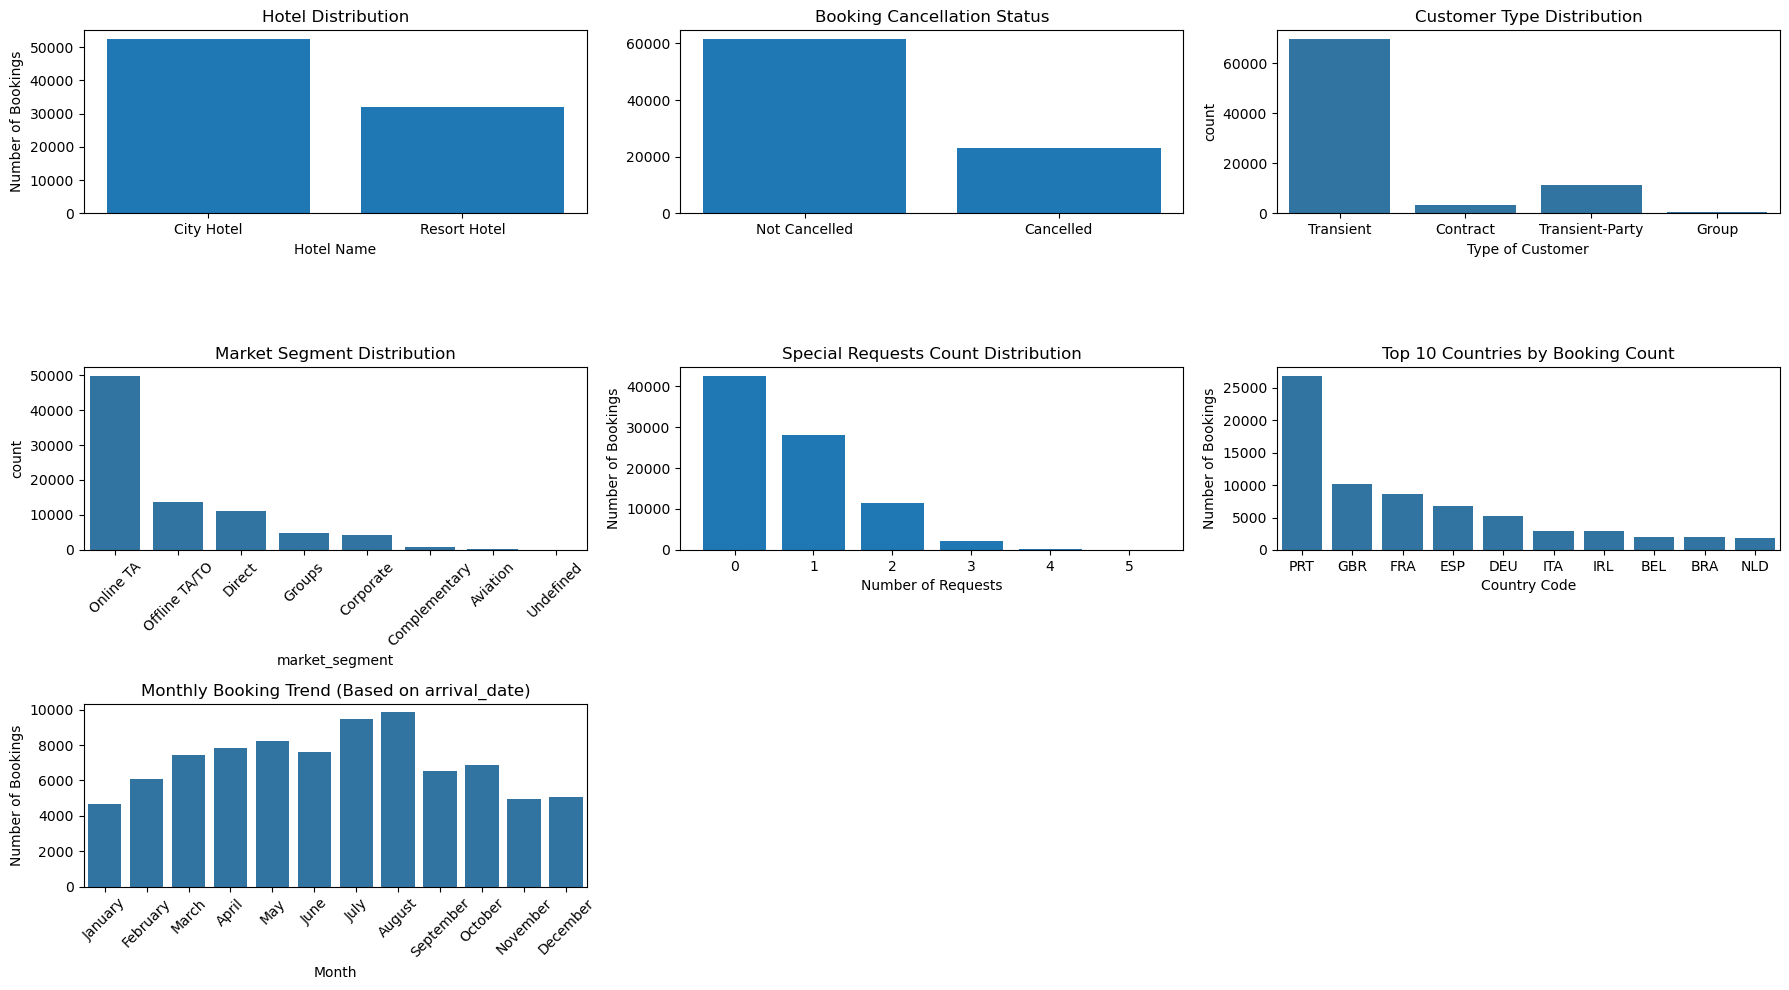

In [186]:
## BARPLOTS

plt.figure(figsize = (18,10))

## 1. Hotel Type

plt.subplot(3,3,1)
plt.bar(df['hotel'].value_counts().index, df['hotel'].value_counts())
plt.title('Hotel Distribution')
plt.xlabel('Hotel Name')
plt.ylabel('Number of Bookings')

## 2. Booking Cancellation Status

plt.subplot(3,3,2)
plt.bar(df['is_canceled'].value_counts().index, df['is_canceled'].value_counts())
plt.title('Booking Cancellation Status')
plt.xticks([0,1],['Not Cancelled', 'Cancelled'])

## 3. Customer Type

plt.subplot(3,3,3)
sns.countplot(data=df, x='customer_type')
plt.title('Customer Type Distribution')
plt.xlabel('Type of Customer')

## 4. Market Segment Distribution

plt.subplot(3,3,4)
sns.countplot(data=df, x='market_segment', order=df['market_segment'].value_counts().index)
plt.title('Market Segment Distribution')
plt.xticks(rotation=45)

## 5. Special Requests

plt.subplot(3,3,5)
plt.bar(df['total_of_special_requests'].value_counts().index, df['total_of_special_requests'].value_counts())
plt.title('Special Requests Count Distribution')
plt.xlabel('Number of Requests')
plt.ylabel('Number of Bookings')

# 6. Get top 10 countries
top_countries = df['country'].value_counts().head(10)

plt.subplot(3,3,6)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries by Booking Count')
plt.xlabel('Country Code')
plt.ylabel('Number of Bookings')

## 7. Monthly Booking Trend

df['arrival_month'] = df['Arrival_Date'].dt.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.subplot(3,3,7)
sns.countplot(data=df, x='arrival_month', order=month_order)
plt.title('Monthly Booking Trend (Based on arrival_date)')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

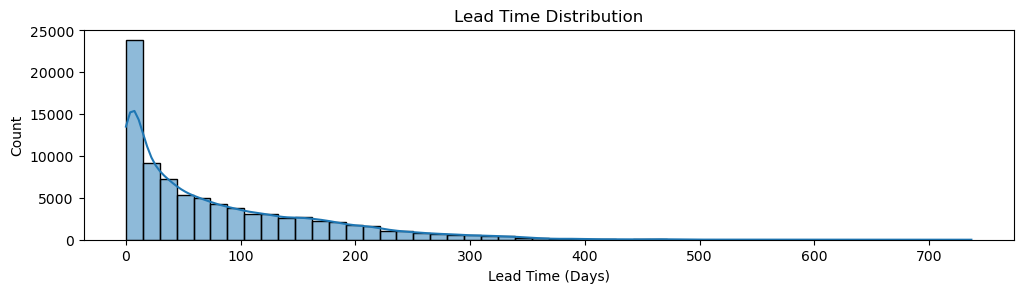

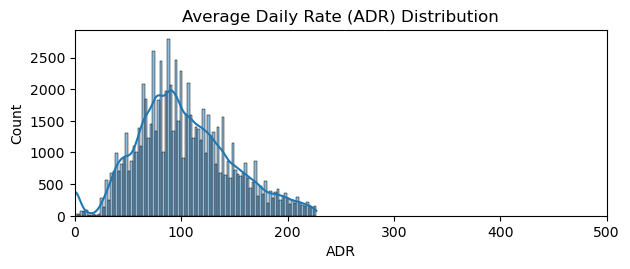

In [187]:
## HISTOGRAMS

plt.figure(figsize = (12,6))

## 1. Lead Time Distribution

plt.subplot(2,1,1)
sns.histplot(df['lead_time'], bins=50, kde=True)
plt.title('Lead Time Distribution')
plt.xlabel('Lead Time (Days)')
plt.show()

## 2. ADR Distribution

plt.subplot(2,1,2)
sns.histplot(df['adr'], bins=100, kde=True)
plt.title('Average Daily Rate (ADR) Distribution')
plt.xlabel('ADR')
plt.xlim(0, 500)

plt.tight_layout()
plt.show()

BIVARIATE ANALYSIS

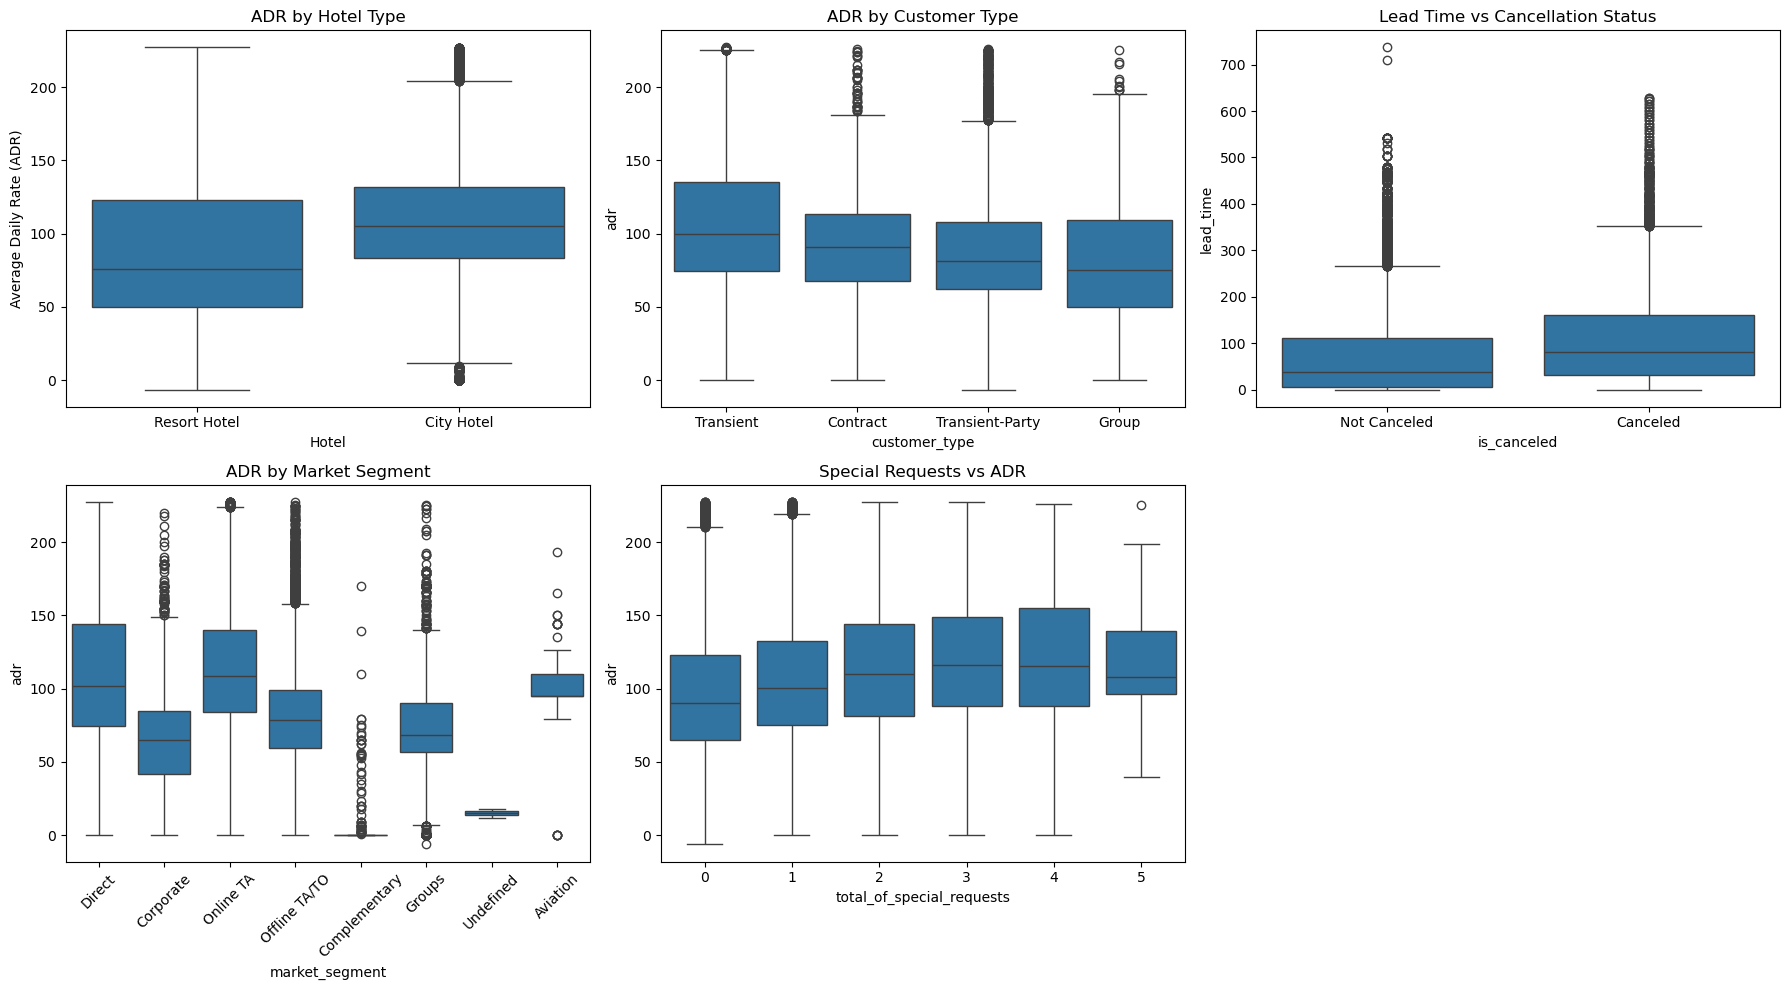

In [190]:
## BOXPLOTS

plt.figure(figsize = (18,10))

## 1. ADR by Hotel Type

plt.subplot(2,3,1)
sns.boxplot(x = df['hotel'], y = df['adr'])
plt.title('ADR by Hotel Type')
plt.xlabel('Hotel')
plt.ylabel('Average Daily Rate (ADR)')

## 2. ADR by Customer Type

plt.subplot(2,3,2)
sns.boxplot(x = df['customer_type'], y = df['adr'])
plt.title('ADR by Customer Type')

## 3. Lead Time vs Cancellation Status

plt.subplot(2,3,3)
sns.boxplot(x = df['is_canceled'], y = df['lead_time'])
plt.title('Lead Time vs Cancellation Status')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])

## 4. ADR by Market Segment

plt.subplot(2,3,4)
sns.boxplot(data=df, x='market_segment', y='adr')
plt.title('ADR by Market Segment')
plt.xticks(rotation=45)

## 5. ADR vs Special Requests

plt.subplot(2,3,5)
sns.boxplot(data=df, x='total_of_special_requests', y='adr')
plt.title('Special Requests vs ADR')


plt.tight_layout()
plt.show()

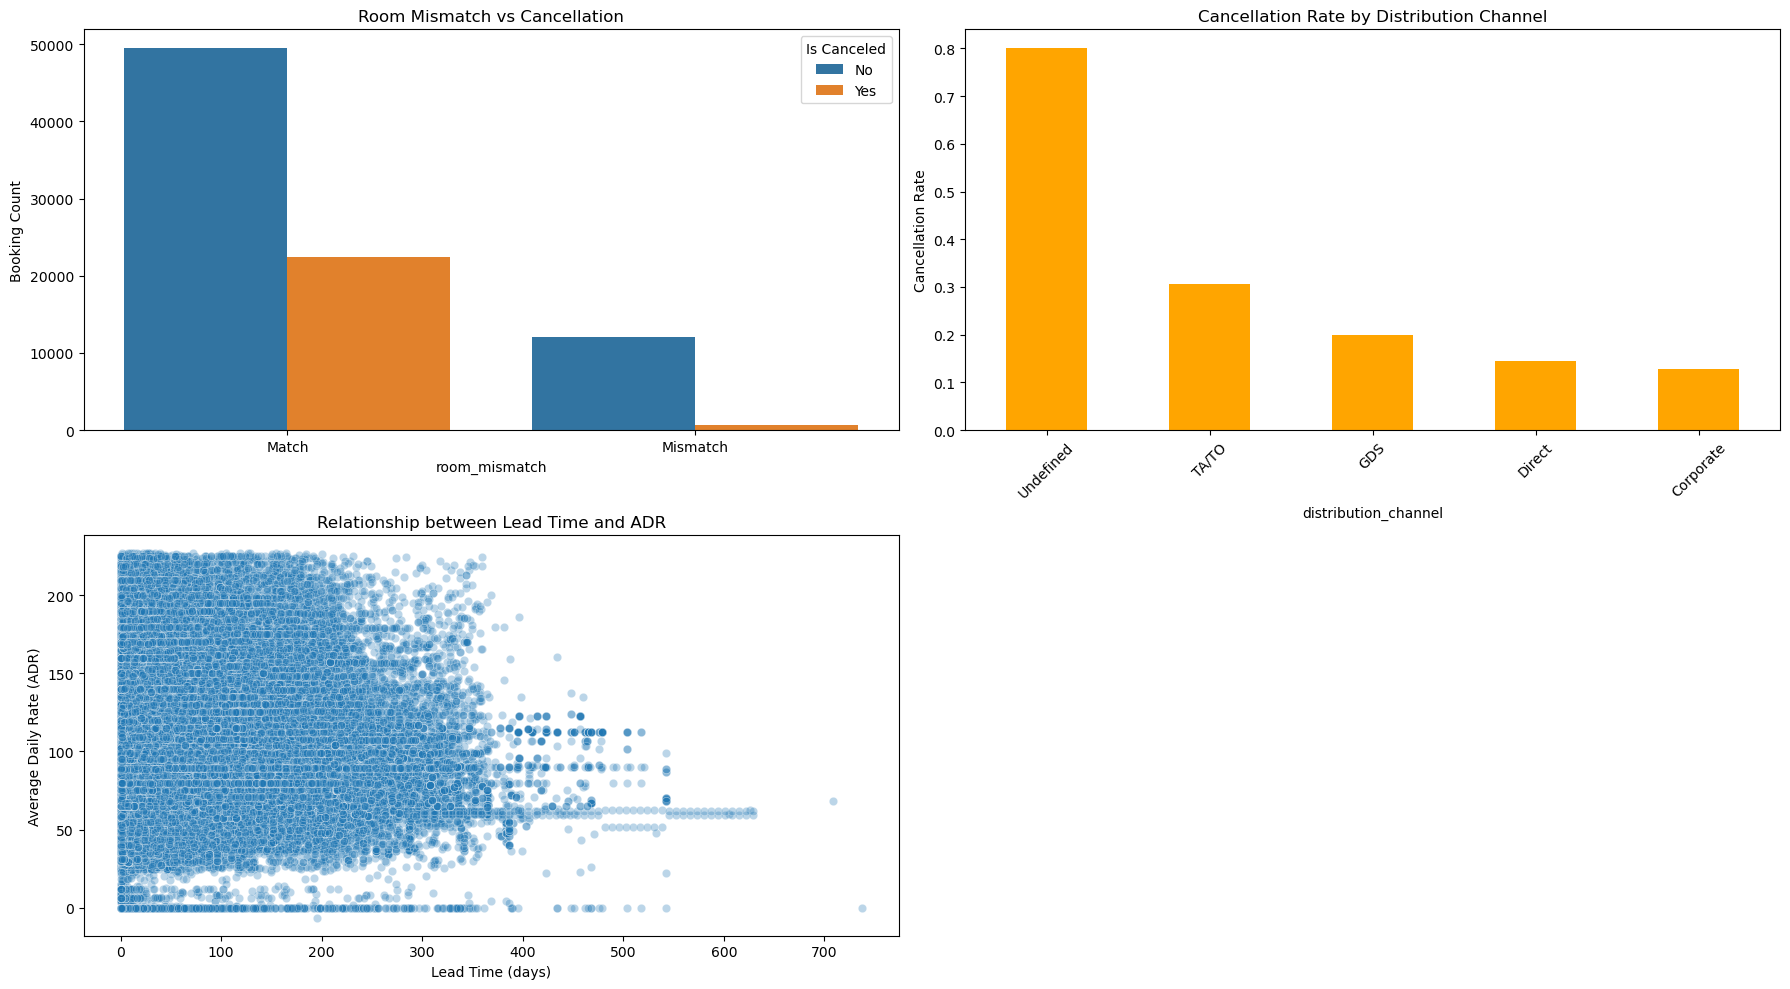

In [192]:
plt.figure(figsize = (18,10))

## 1. Room Mismatch vs Cancellation

plt.subplot(2,2,1)
sns.countplot(x = df['room_mismatch'], hue = df['is_canceled'])
plt.title('Room Mismatch vs Cancellation')
plt.xticks([0, 1], ['Match', 'Mismatch'])
plt.ylabel('Booking Count')
plt.legend(title='Is Canceled', labels=['No', 'Yes'])

## 2. Cancellation Rate by Distribution Channel

cancel_rate = df.groupby('distribution_channel')['is_canceled'].mean().sort_values(ascending=False)
plt.subplot(2,2,2)
cancel_rate.plot(kind='bar', color='orange')
plt.title('Cancellation Rate by Distribution Channel')
plt.xticks(rotation=45)
plt.ylabel('Cancellation Rate')

## 3. Lead Time vs ADR

plt.subplot(2,2,3)
sns.scatterplot(data=df, x='lead_time', y='adr', alpha=0.3)
plt.title('Relationship between Lead Time and ADR')
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Daily Rate (ADR)')

plt.tight_layout()
plt.show()

MULTIVARIATE ANALYSIS

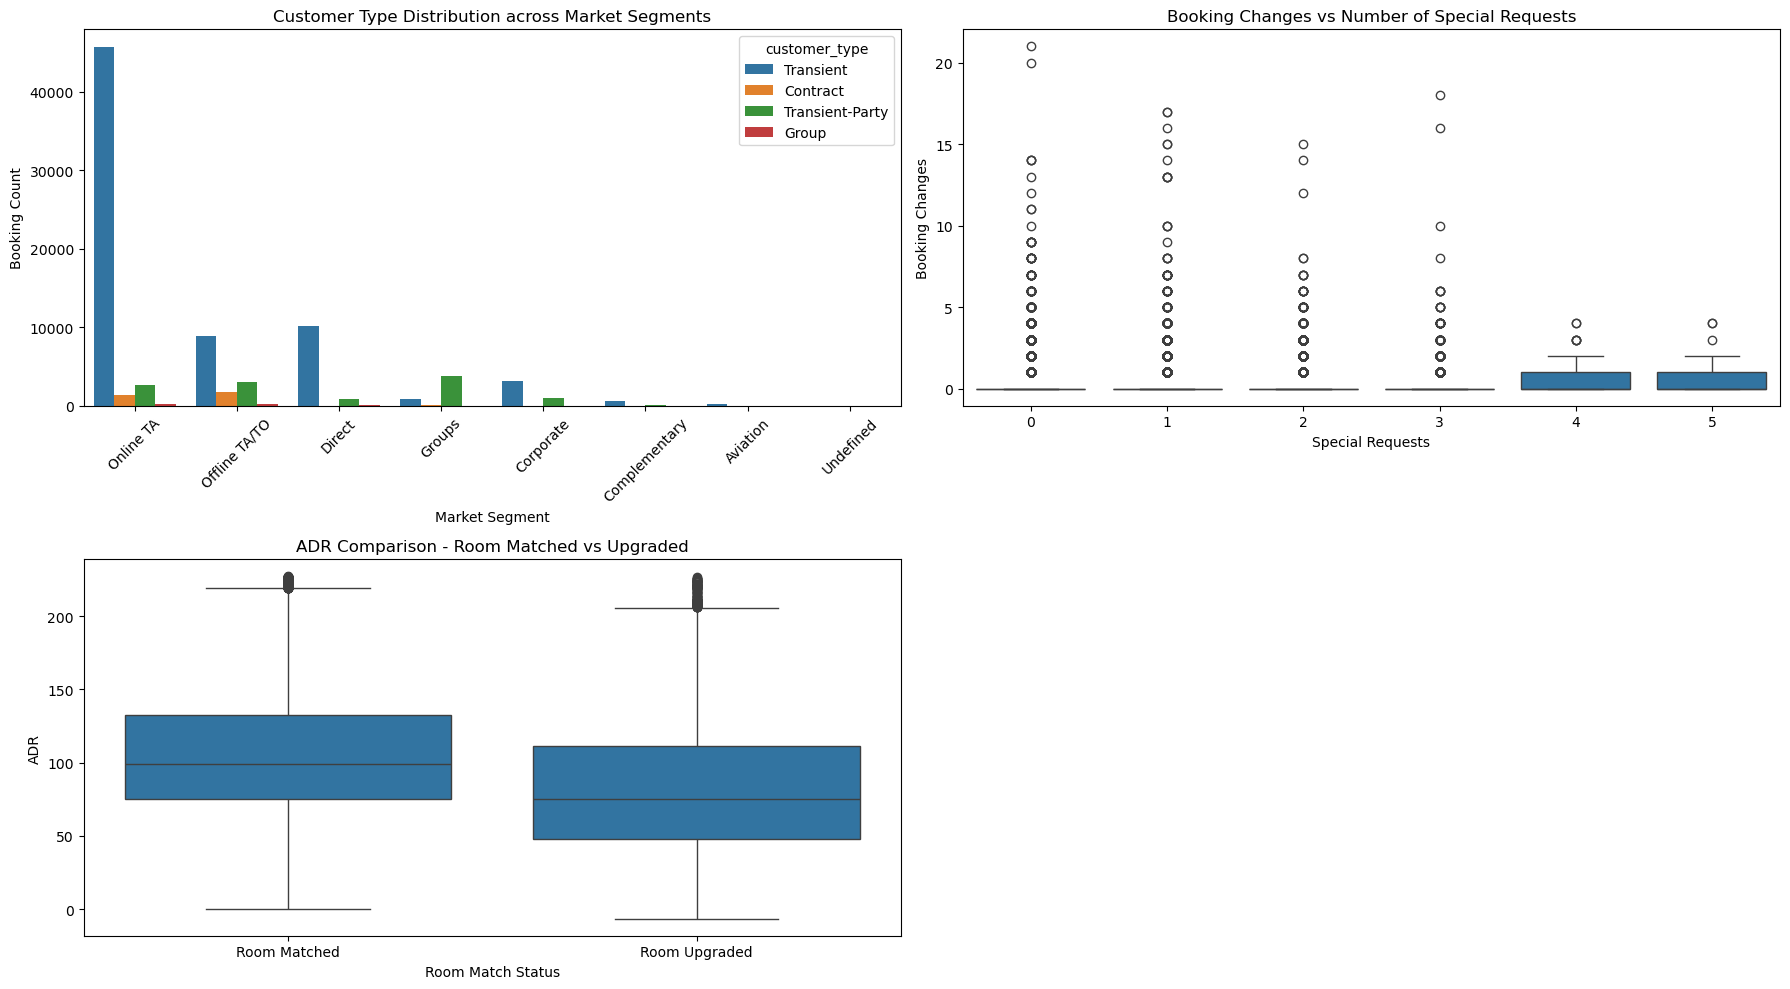

In [196]:
plt.figure(figsize = (18,10))

## 1. Customer Type per Market Segment

plt.subplot(2,2,1)
sns.countplot(data=df, x='market_segment', hue='customer_type', order=df['market_segment'].value_counts().index)
plt.title('Customer Type Distribution across Market Segments')
plt.xlabel('Market Segment')
plt.ylabel('Booking Count')
plt.xticks(rotation=45)


## 2. Booking Changes vs Total no. of special requests

plt.subplot(2,2,2)
sns.boxplot(data=df, x='total_of_special_requests', y='booking_changes')
plt.title('Booking Changes vs Number of Special Requests')
plt.xlabel('Special Requests')
plt.ylabel('Booking Changes')

## 3. ADR vs Room Mismatch

plt.subplot(2,2,3)
sns.boxplot(data=df, x='room_mismatch', y='adr')
plt.xticks([0, 1], ['Room Matched', 'Room Upgraded'])
plt.title('ADR Comparison - Room Matched vs Upgraded')
plt.xlabel('Room Match Status')
plt.ylabel('ADR')

plt.tight_layout()
plt.show()

TIME SERIES ANALYSIS

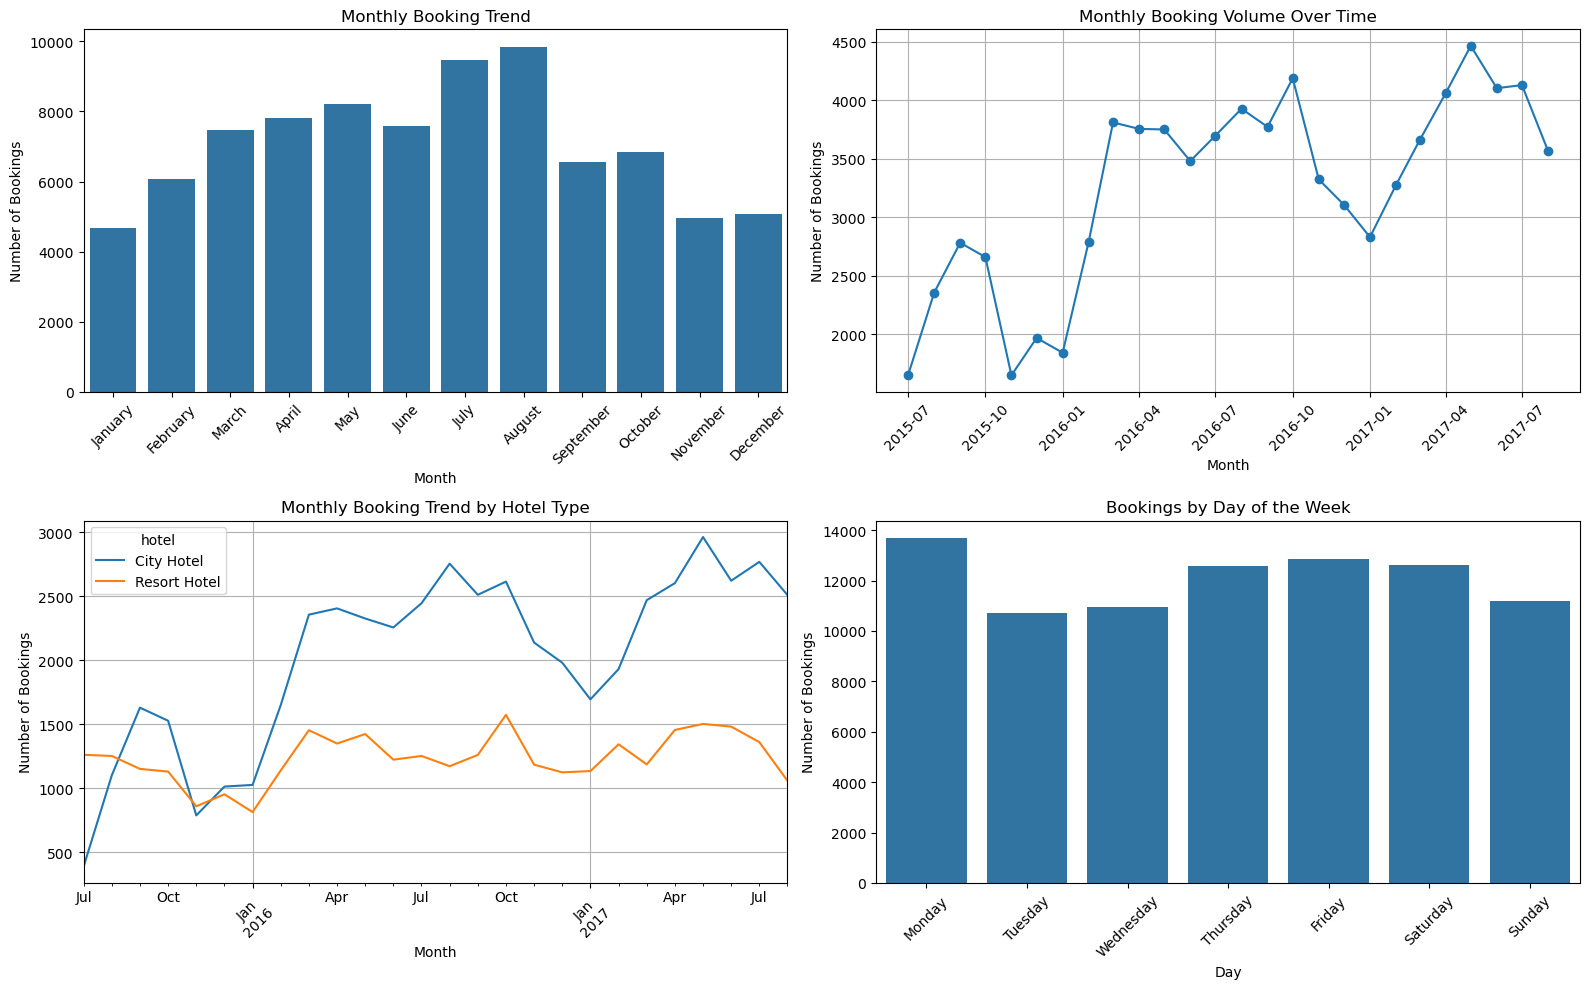

In [199]:
plt.figure(figsize=(16,10))  # Increase figure size for 2x2 layout

## 1. Monthly Booking Trend
df['arrival_month'] = df['Arrival_Date'].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.subplot(2,2,1)
sns.countplot(data=df, x='arrival_month', order=month_order)
plt.title('Monthly Booking Trend')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)

## 2. Monthly Booking Volume (Time Series)
monthly_bookings = df.groupby(df['Arrival_Date'].dt.to_period('M')).size()
monthly_bookings.index = monthly_bookings.index.to_timestamp()

plt.subplot(2,2,2)
plt.plot(monthly_bookings.index, monthly_bookings.values, marker='o', linestyle='-')
plt.title('Monthly Booking Volume Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid(True)

## 3. Monthly Booking Trend by Hotel
df['month'] = df['Arrival_Date'].dt.to_period('M')
monthly_trend_hotel = df.groupby(['month', 'hotel']).size().unstack()
monthly_trend_hotel.index = monthly_trend_hotel.index.to_timestamp()

ax3 = plt.subplot(2,2,3)
monthly_trend_hotel.plot(ax=ax3)
plt.title('Monthly Booking Trend by Hotel Type')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.xticks(rotation=45)

## 4. Bookings by Day of the Week
df['dayofweek'] = df['Arrival_Date'].dt.day_name()

plt.subplot(2,2,4)
sns.countplot(data=df, x='dayofweek', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Bookings by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


CORRELATION ANALYSIS

In [201]:
## Numerical Columns

numerical_df = df.select_dtypes(include='number')
numerical_df.columns

Index(['is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'room_mismatch', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [204]:
## Pearson Correlation Matrix

correlation_matrix = numerical_df.corr(method='pearson')
correlation_matrix

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,room_mismatch,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.186753,0.055830,0.079127,0.081372,0.049884,-0.089690,0.052486,-0.052367,-0.092164,-0.212092,0.006873,0.133211,-0.180623,-0.116655
lead_time,0.186753,1.000000,0.235210,0.311599,0.145143,0.028057,-0.149073,0.005272,-0.080137,0.077557,-0.113642,0.132087,0.040944,-0.087891,0.037448
stays_in_weekend_nights,0.055830,0.235210,1.000000,0.556201,0.088952,0.028235,-0.109383,-0.020845,-0.057383,0.050125,-0.106729,-0.030143,0.034595,-0.046156,0.031354
stays_in_week_nights,0.079127,0.311599,0.556201,1.000000,0.095189,0.029904,-0.115357,-0.018820,-0.058921,0.085653,-0.114571,0.002917,0.045600,-0.048035,0.036165
adults,0.081372,0.145143,0.088952,0.095189,1.000000,0.014965,-0.173330,-0.041597,-0.121363,-0.051902,-0.069565,-0.014279,0.258366,0.001955,0.112960
children,0.049884,0.028057,0.028235,0.029904,0.014965,1.000000,-0.044401,-0.018434,-0.028796,0.051457,-0.015074,-0.019365,0.258634,0.035689,0.073728
is_repeated_guest,-0.089690,-0.149073,-0.109383,-0.115357,-0.173330,-0.044401,1.000000,0.207232,0.442860,0.004931,0.089107,-0.012780,-0.178385,0.073243,-0.003215
previous_cancellations,0.052486,0.005272,-0.020845,-0.018820,-0.041597,-0.018434,0.207232,1.000000,0.392142,-0.010094,-0.009848,0.003852,-0.054827,-0.002807,0.002219
previous_bookings_not_canceled,-0.052367,-0.080137,-0.057383,-0.058921,-0.121363,-0.028796,0.442860,0.392142,1.000000,0.005717,0.041600,-0.006362,-0.096672,0.042083,0.027455
booking_changes,-0.092164,0.077557,0.050125,0.085653,-0.051902,0.051457,0.004931,-0.010094,0.005717,1.000000,0.077957,0.025504,-0.013127,0.044436,0.011630


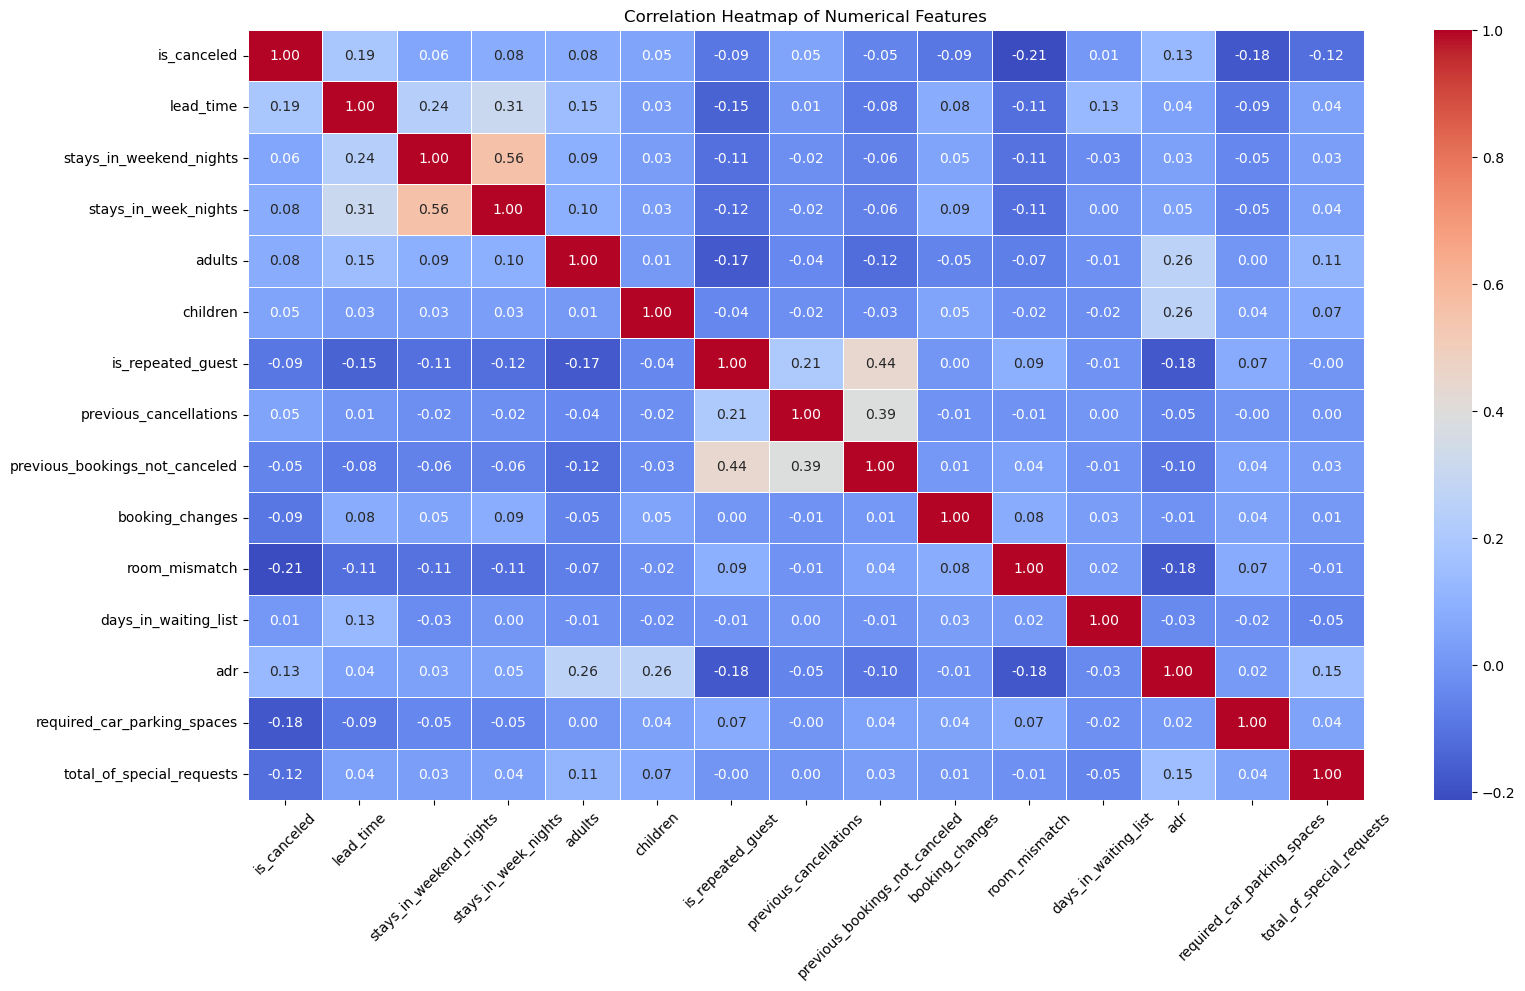

In [206]:
plt.figure(figsize=(18,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.xticks(rotation=45)
plt.show()


In [207]:
## Correlation of ADR with numeric columns

adr_corr = correlation_matrix['adr'].sort_values(ascending=False)

print("Correlation of 'adr' with other features:")
print(adr_corr)


Correlation of 'adr' with other features:
adr                               1.000000
children                          0.258634
adults                            0.258366
total_of_special_requests         0.152206
is_canceled                       0.133211
stays_in_week_nights              0.045600
lead_time                         0.040944
stays_in_weekend_nights           0.034595
required_car_parking_spaces       0.019110
booking_changes                  -0.013127
days_in_waiting_list             -0.034790
previous_cancellations           -0.054827
previous_bookings_not_canceled   -0.096672
is_repeated_guest                -0.178385
room_mismatch                    -0.181654
Name: adr, dtype: float64


HYPOTHESIS TESTING

In [211]:
## 1.

## H0: There is no difference in ADR between bookings made through Online TA and Direct channels.
## i.e. avg(ADR from Online TA) = avg(ADR from Direct)

online_ta = df[df['distribution_channel'] == 'TA/TO']['adr']
direct = df[df['distribution_channel'] == 'Direct']['adr']

In [213]:
t_score, p_value = ttest_ind(online_ta, direct, equal_var=False)  ## p-value < 0.05, so we reject H0.

if p_value < 0.05:
    print('We reject the Null Hypothesis.')
else:
    print('We do not reject the Null Hypothesis.')

We reject the Null Hypothesis.


In [215]:
## 2. 

## H0: Room upgrades are independent of lead time

upgraded = df[df['room_mismatch'] == 1]['lead_time']
not_upgraded = df[df['room_mismatch'] == 0]['lead_time']

t_score, p_value = ttest_ind(upgraded, not_upgraded, equal_var=False)  

if p_value < 0.05:
    print('We reject the Null Hypothesis.')
else:
    print('We do not reject the Null Hypothesis.')

We reject the Null Hypothesis.


In [217]:
## 3. 

## H0: Average stay duration does not differ between customer types
## i.e. avg(stay_duration of Transient) == avg(stay_duration of Contract) == avg(stay_duration of Transient-Party) == avg(stay_duration of Group) 

df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Transient
df_T = df[df['customer_type'] == 'Transient'][['stay_duration']].copy()
df_T['customer_type'] = 'Transient'

# Contract
df_C = df[df['customer_type'] == 'Contract'][['stay_duration']].copy()
df_C['customer_type'] = 'Contract'

# Transient-Party
df_TP = df[df['customer_type'] == 'Transient-Party'][['stay_duration']].copy()
df_TP['customer_type'] = 'Transient-Party'

# Group
df_G = df[df['customer_type'] == 'Group'][['stay_duration']].copy()
df_G['customer_type'] = 'Group'

df_total = pd.concat([df_T, df_C,df_TP, df_G])

## One Way ANOVA Test

mod1 = ols('stay_duration ~ customer_type',data=df_total).fit()
tbl = sm.stats.anova_lm(mod1)
print(tbl)

                    df         sum_sq      mean_sq           F  PR(>F)
customer_type      3.0   19633.918456  6544.639485  878.966533     0.0
Residual       84586.0  629813.371401     7.445835         NaN     NaN


In [218]:
print(pairwise_tukeyhsd(endog=df_total['stay_duration'],groups=df_total['customer_type']))

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1       group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
 Contract           Group  -3.0954    0.0 -3.4235 -2.7672   True
 Contract       Transient  -2.4788    0.0 -2.6068 -2.3509   True
 Contract Transient-Party   -2.683    0.0 -2.8244 -2.5415   True
    Group       Transient   0.6165    0.0   0.312   0.921   True
    Group Transient-Party   0.4124 0.0036   0.102  0.7228   True
Transient Transient-Party  -0.2041    0.0 -0.2751 -0.1331   True
----------------------------------------------------------------


In [220]:
## p-value < 0.05, so we reject the Null Hypothesis.

Key Business Questions

1. What influences ADR the most?

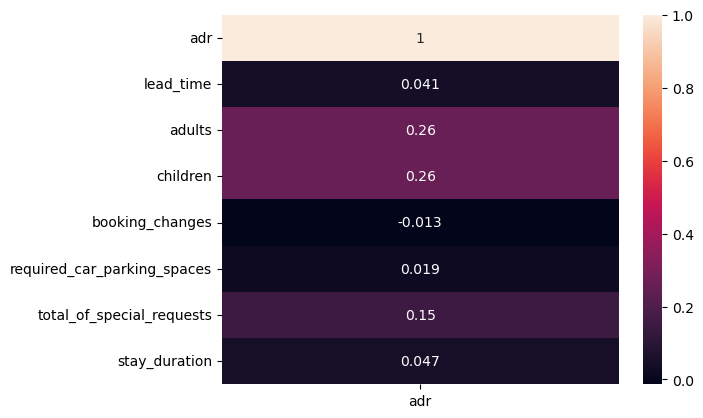

In [225]:
## Correlation of ADR with numeric columns

num_cols = ['adr', 'lead_time', 'adults', 'children', 'booking_changes',
            'required_car_parking_spaces', 'total_of_special_requests',
            'stay_duration']

corr = df[num_cols].corr()

sns.heatmap(corr[['adr']], annot=True)
plt.show()

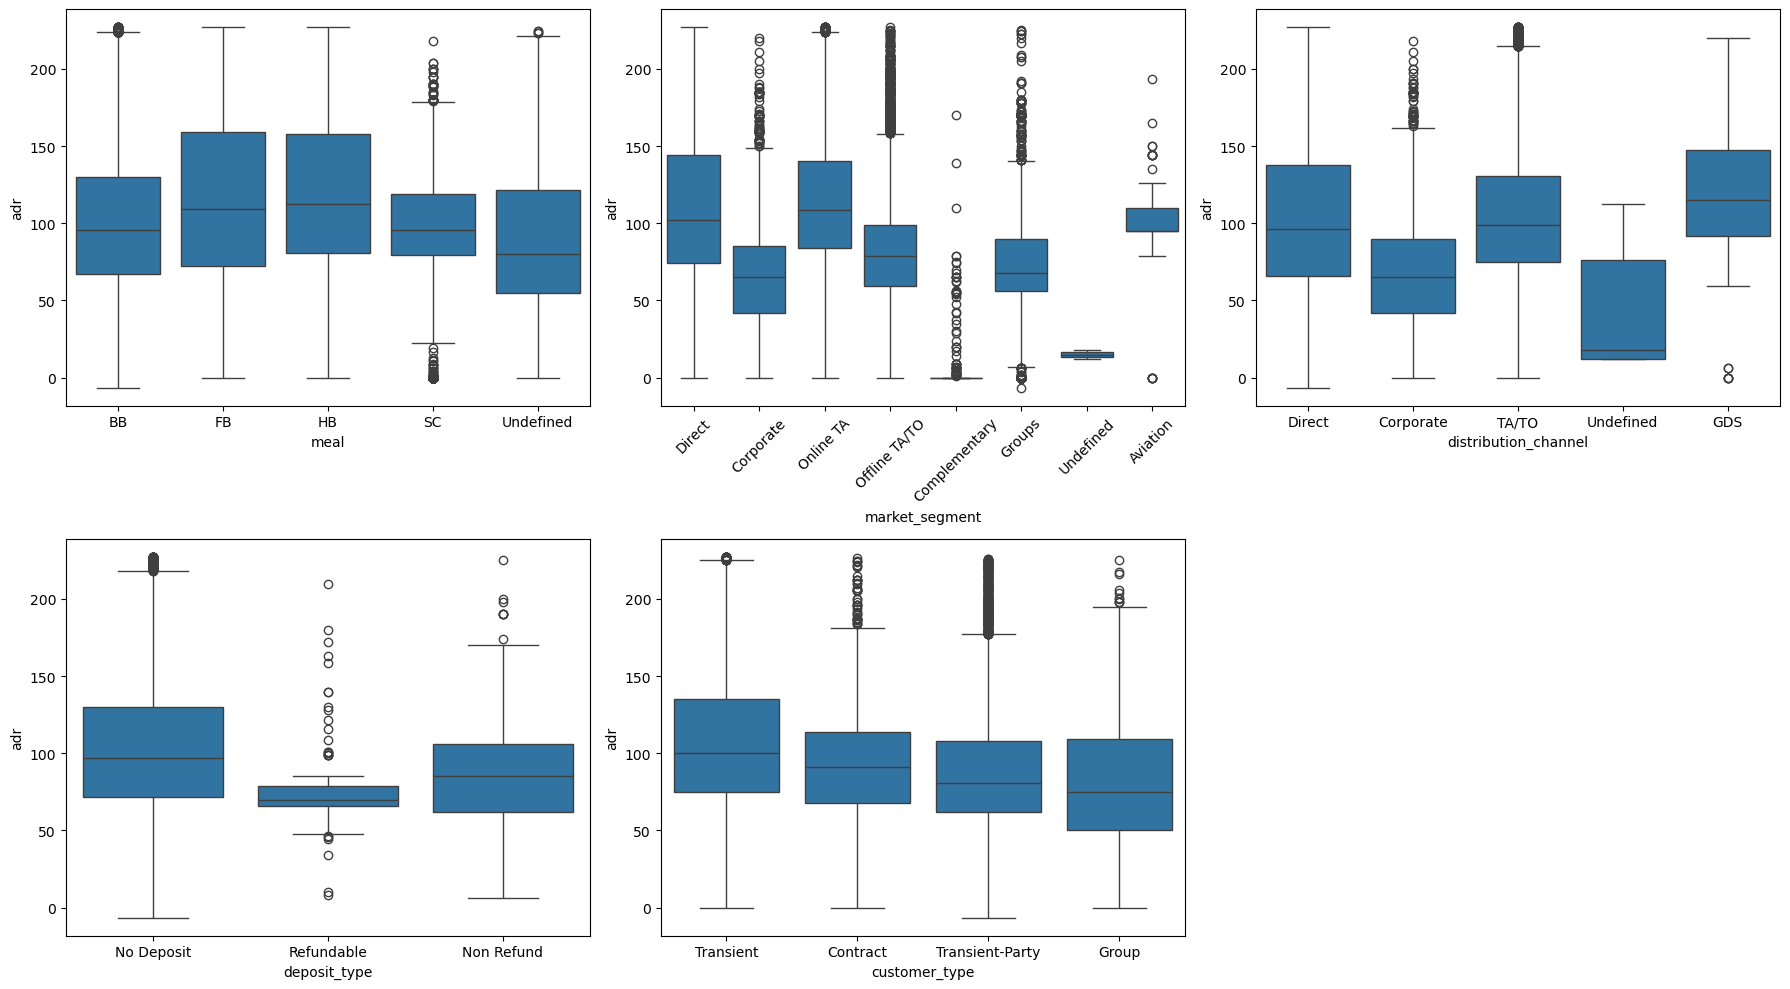

In [227]:
## Correlation of ADR with categorical columns

plt.figure(figsize=(18,10))

## 1. Meal vs ADR

plt.subplot(2,3,1)
sns.boxplot(x=df['meal'], y=df['adr'])

## 2. Market Segment vs ADR

plt.subplot(2,3,2)
sns.boxplot(x=df['market_segment'], y=df['adr'])
plt.xticks(rotation=45)

## 3. Distribution Channel vs ADR

plt.subplot(2,3,3)
sns.boxplot(x=df['distribution_channel'], y=df['adr'])

## 4. Deposit Type vs ADR

plt.subplot(2,3,4)
sns.boxplot(x=df['deposit_type'], y=df['adr'])

## 5. Customer Type vs ADR

plt.subplot(2,3,5)
sns.boxplot(x=df['customer_type'], y=df['adr'])

plt.tight_layout()
plt.show()

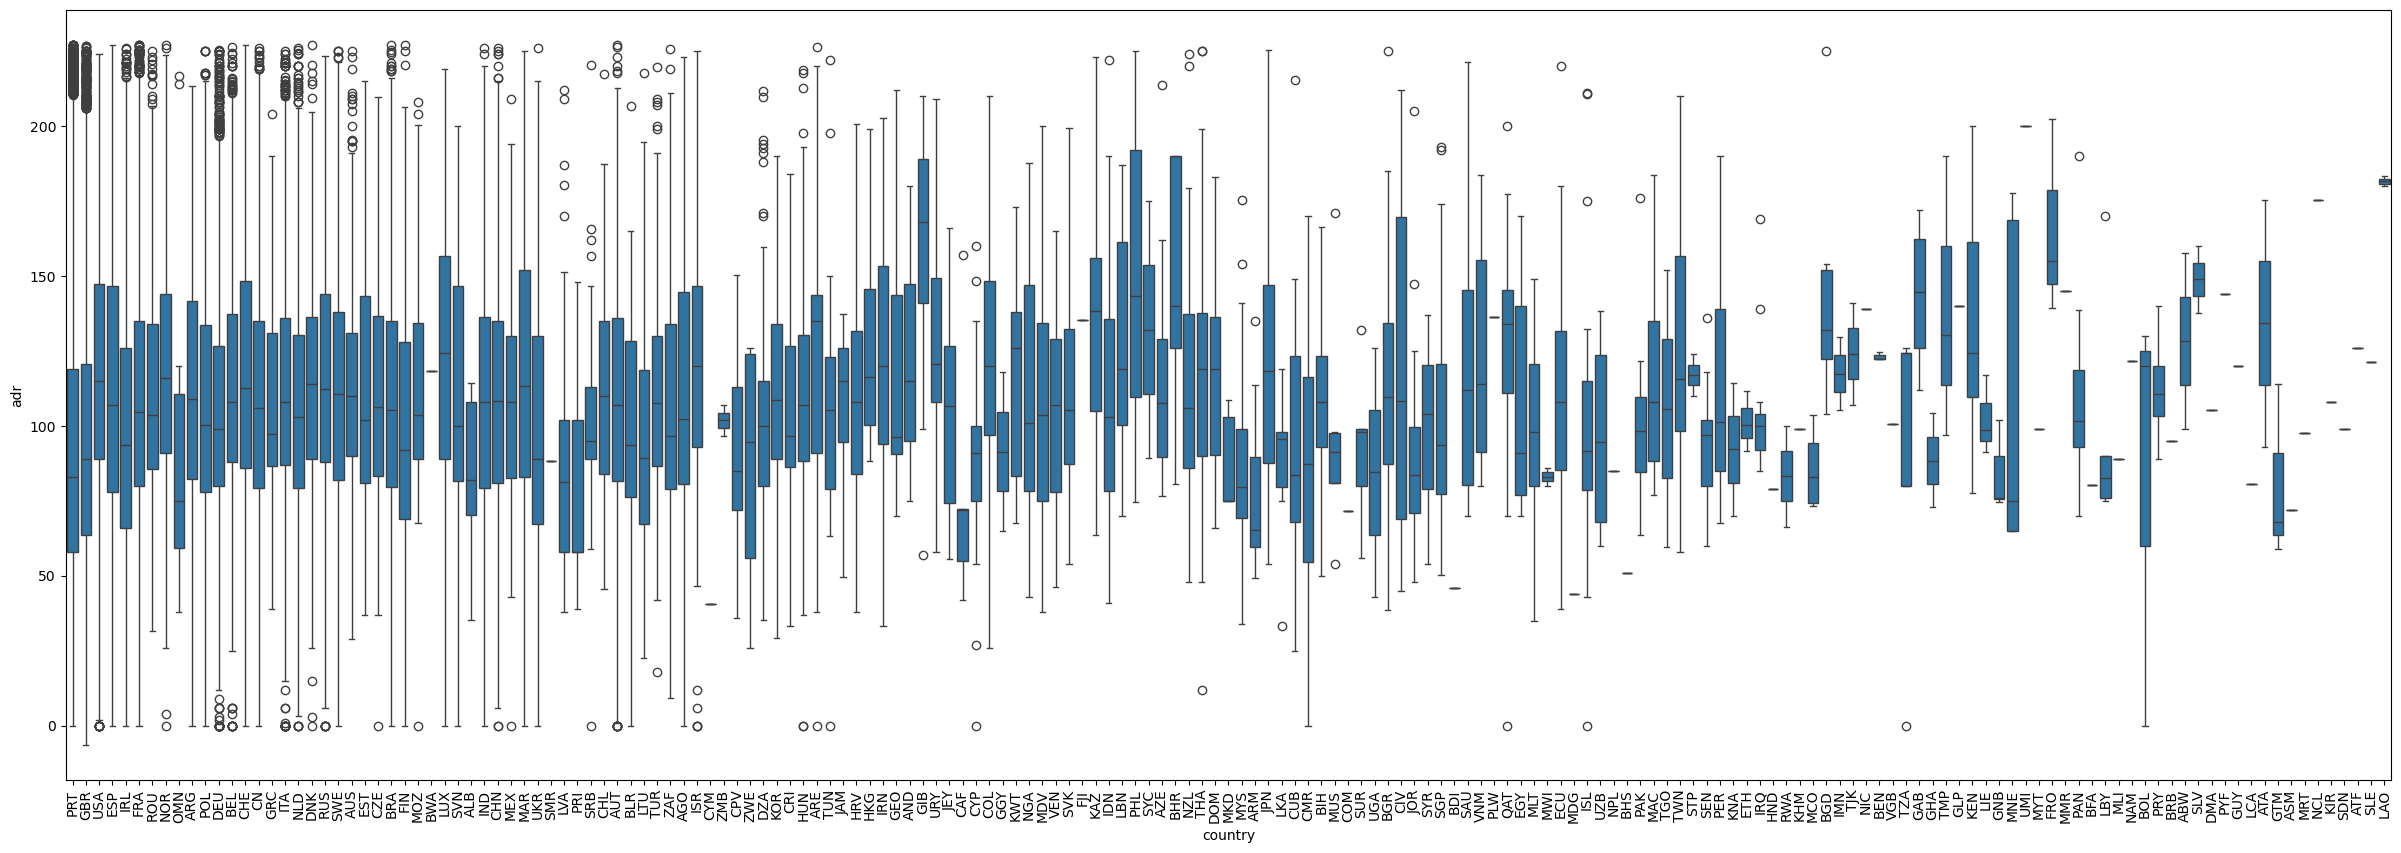

In [228]:
## Country vs ADR

plt.figure(figsize=(30,10))
sns.boxplot(x=df['country'], y=df['adr'])
plt.xticks(rotation=90)
plt.show()

2. Do guests who book earlier tend to request more changes?

In [230]:
## H0 : There is no correlation between lead_time and booking changes.

t_stat, p_value = pearsonr(df['lead_time'], df['booking_changes'])

if p_value < 0.05:
    print('Reject Null Hypothesis.')
else:
    print('Do not reject Null Hypothesis.')


Reject Null Hypothesis.


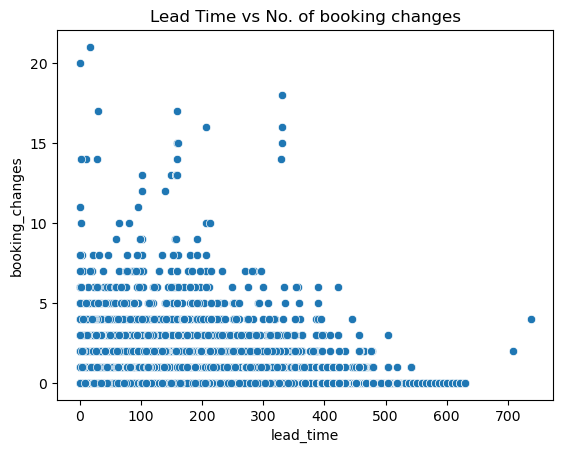

In [231]:
sns.scatterplot(x=df['lead_time'],y=df['booking_changes'])
plt.title('Lead Time vs No. of booking changes')
plt.show()

3. Are there pricing or booking differences across countries?

In [234]:
## Find top 5 countries with the highest booking counts.

top_countries = df['country'].value_counts().head(5).index
df_top = df[df['country'].isin(top_countries)]

In [235]:
## H0 : There is no pricing difference for different countries. 

## One Way ANOVA Test.

mod1 = ols('adr ~ country', data = df_top).fit()
anova_table = sm.stats.anova_lm(mod1)
print(anova_table)

               df        sum_sq       mean_sq           F  PR(>F)
country       4.0  4.731183e+06  1.182796e+06  571.149888     0.0
Residual  57783.0  1.196630e+08  2.070903e+03         NaN     NaN


In [236]:
print(pairwise_tukeyhsd(endog=df_top['adr'],groups=df_top['country']))

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
   DEU    ESP   8.1953   0.0   5.9183  10.4724   True
   DEU    FRA   4.7869   0.0   2.6196   6.9543   True
   DEU    GBR  -9.6341   0.0 -11.7353  -7.5329   True
   DEU    PRT -14.8153   0.0  -16.681 -12.9497   True
   ESP    FRA  -3.4084   0.0  -5.4252  -1.3917   True
   ESP    GBR -17.8294   0.0 -19.7749 -15.8839   True
   ESP    PRT -23.0107   0.0 -24.6991 -21.3223   True
   FRA    GBR  -14.421   0.0 -16.2368 -12.6051   True
   FRA    PRT -19.6022   0.0 -21.1394 -18.0651   True
   GBR    PRT  -5.1813   0.0  -6.6237  -3.7388   True
-----------------------------------------------------


In [237]:
## p-value < 0.05, we reject the Null Hypothesis.

In [238]:
## Booking count vs Country

top_ten_countries = df['country'].value_counts().head(10)
top_ten_countries

country
PRT    26890
GBR    10222
FRA     8610
ESP     6766
DEU     5300
ITA     2987
IRL     2979
BEL     2044
BRA     1954
NLD     1878
Name: count, dtype: int64

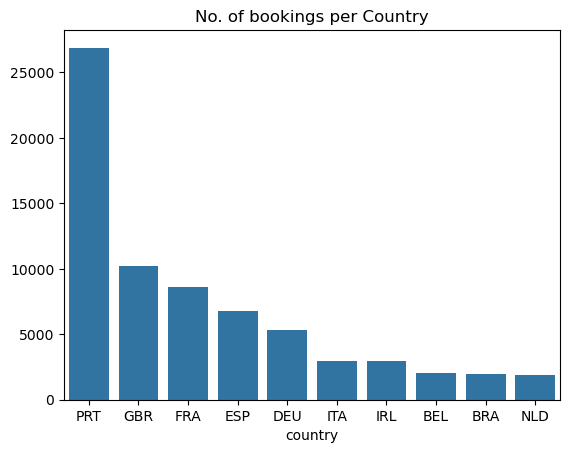

In [239]:
sns.barplot(x=top_ten_countries.index, y=top_ten_countries.values)
plt.title('No. of bookings per Country')
plt.show()

4. Is there a pattern in room upgrades or reassignment?

In [243]:
## H0 : Lead Time has no effect on room reassignment.

upgraded = df[df['room_mismatch'] == 1]['lead_time']
not_upgraded = df[df['room_mismatch'] == 0]['lead_time']

t_stat, p_val = ttest_ind(upgraded, not_upgraded, equal_var=False)

if p_value < 0.05:
    print('Reject Null Hypothesis.')
else:
    print('Do not reject Null Hypothesis.')

Reject Null Hypothesis.


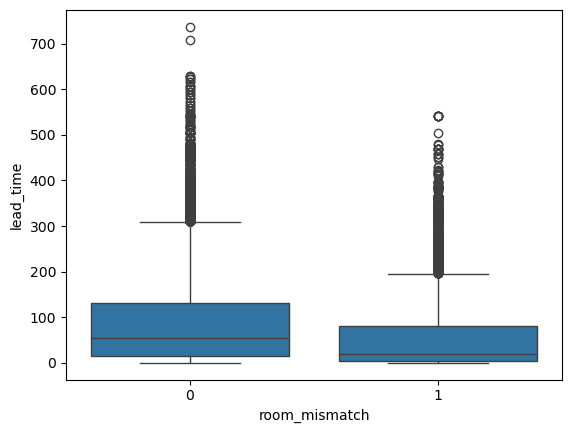

In [246]:
sns.boxplot(x='room_mismatch', y='lead_time', data=df)
plt.show()

In [359]:
## H0 : Customer Type does not affect room reassignment.


chi2, p_value, dof, ex = chi2_contingency(room_cust_ct)
if p_value < 0.05:
    print('Reject Null Hypothesis.')
else:
    print('Do not reject Null Hypothesis.')

NameError: name 'room_cust_ct' is not defined

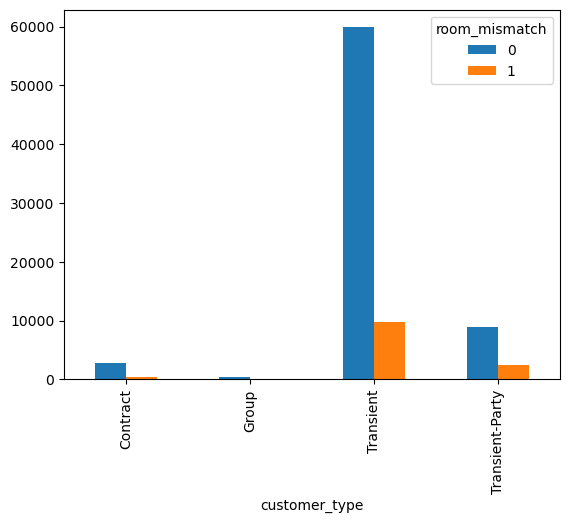

In [361]:
room_cust_ct = pd.crosstab(df['customer_type'], df['room_mismatch'])
room_cust_ct.plot(kind='bar')
plt.show()

5. Are reserved room types consistently matched with assigned room types?

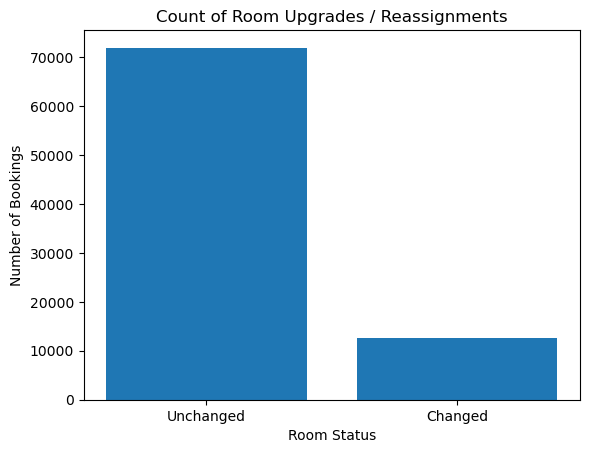

In [364]:
plt.bar(df['room_mismatch'].value_counts().index, df['room_mismatch'].value_counts())
plt.xticks([0,1], ['Unchanged', 'Changed'])
plt.xlabel('Room Status')
plt.ylabel('Number of Bookings')
plt.title('Count of Room Upgrades / Reassignments')
plt.show()

In [366]:
match_rate = df['room_mismatch'].value_counts(normalize=True) * 100
print('Percent of Bookings where Reserved Room and Assigned Room were the same: ',match_rate.iloc[0])
print('Percent of Bookings where Rooms were changed: ',match_rate.iloc[1])

Percent of Bookings where Reserved Room and Assigned Room were the same:  84.9911337037475
Percent of Bookings where Rooms were changed:  15.008866296252513


6. What are the most common guest demographics (e.g., group size, nationality)?

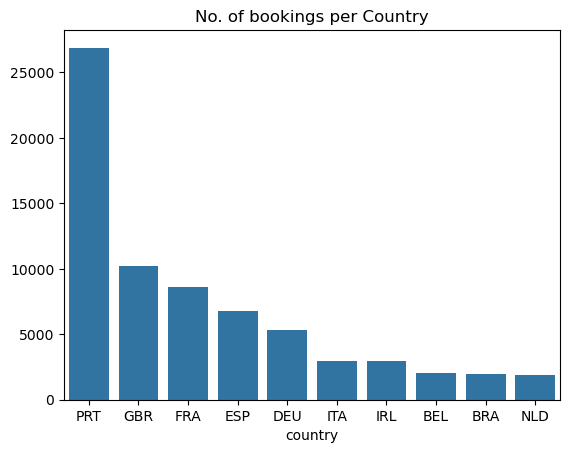

In [369]:
## Most common countries.

top_ten_countries = df['country'].value_counts().head(10)

sns.barplot(x=top_ten_countries.index, y=top_ten_countries.values)
plt.title('No. of bookings per Country')
plt.show()

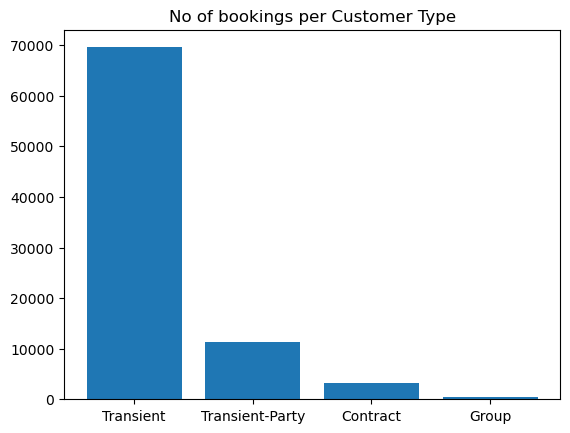

In [371]:
## Most Common Customer Type

plt.bar(df['customer_type'].value_counts().index,df['customer_type'].value_counts())
plt.title('No of bookings per Customer Type')
plt.show()

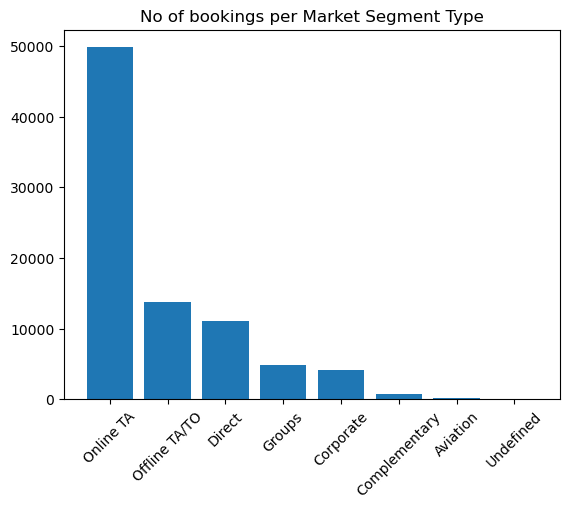

In [373]:
## Most Common Customer Type

plt.bar(df['market_segment'].value_counts().index,df['market_segment'].value_counts())
plt.title('No of bookings per Market Segment Type')
plt.xticks(rotation=45)
plt.show()

7. Are there patterns in guest types (e.g., transient vs. corporate) that influence booking behavior? 

In [376]:
## Stay Duration per Customer Type

## H0: Average stay duration does not differ by customer type

mod1 = ols('stay_duration ~ customer_type', data=df).fit()
anova_table = sm.stats.anova_lm(mod1)
print(anova_table)

                    df         sum_sq      mean_sq           F  PR(>F)
customer_type      3.0   19633.918456  6544.639485  878.966533     0.0
Residual       84586.0  629813.371401     7.445835         NaN     NaN


In [378]:
print(pairwise_tukeyhsd(endog=df['stay_duration'],groups=df['customer_type']))

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1       group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
 Contract           Group  -3.0954    0.0 -3.4235 -2.7672   True
 Contract       Transient  -2.4788    0.0 -2.6068 -2.3509   True
 Contract Transient-Party   -2.683    0.0 -2.8244 -2.5415   True
    Group       Transient   0.6165    0.0   0.312   0.921   True
    Group Transient-Party   0.4124 0.0036   0.102  0.7228   True
Transient Transient-Party  -0.2041    0.0 -0.2751 -0.1331   True
----------------------------------------------------------------


In [380]:
## H0: Lead time does not vary across Customer Type

mod1 = ols('lead_time ~ customer_type', data=df).fit()
anova_table = sm.stats.anova_lm(mod1)
print(anova_table)

                    df        sum_sq       mean_sq           F  PR(>F)
customer_type      3.0  1.846668e+07  6.155560e+06  850.547375     0.0
Residual       84586.0  6.121637e+08  7.237175e+03         NaN     NaN


In [382]:
print(pairwise_tukeyhsd(endog=df['lead_time'],groups=df['customer_type']))

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1       group2     meandiff p-adj   lower    upper   reject
------------------------------------------------------------------
 Contract           Group -56.8508    0.0 -67.0823 -46.6194   True
 Contract       Transient -35.7896    0.0 -39.7794 -31.7999   True
 Contract Transient-Party   3.8236 0.1158  -0.5861   8.2332  False
    Group       Transient  21.0612    0.0  11.5671  30.5552   True
    Group Transient-Party  60.6744    0.0  50.9964  70.3524   True
Transient Transient-Party  39.6132    0.0  37.3996  41.8268   True
------------------------------------------------------------------


In [384]:
## H0: ADR is same for all customer types

mod1 = ols('adr ~ customer_type', data=df).fit()
anova_table = sm.stats.anova_lm(mod1)
print(anova_table)

                    df        sum_sq       mean_sq           F  PR(>F)
customer_type      3.0  4.231458e+06  1.410486e+06  706.941119     0.0
Residual       84586.0  1.687656e+08  1.995196e+03         NaN     NaN


In [386]:
print(pairwise_tukeyhsd(endog=df['adr'],groups=df['customer_type']))

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1       group2     meandiff p-adj   lower    upper   reject
------------------------------------------------------------------
 Contract           Group -11.7601    0.0 -17.1322   -6.388   True
 Contract       Transient   12.446    0.0  10.3512  14.5409   True
 Contract Transient-Party  -7.0625    0.0  -9.3778  -4.7471   True
    Group       Transient  24.2062    0.0  19.2212  29.1911   True
    Group Transient-Party   4.6977 0.0819  -0.3839   9.7792  False
Transient Transient-Party -19.5085    0.0 -20.6707 -18.3463   True
------------------------------------------------------------------


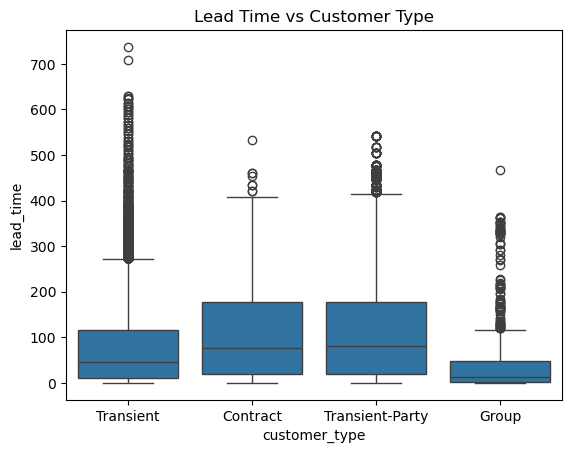

In [388]:
sns.boxplot(x='customer_type', y='lead_time', data=df)
plt.title('Lead Time vs Customer Type')
plt.show()

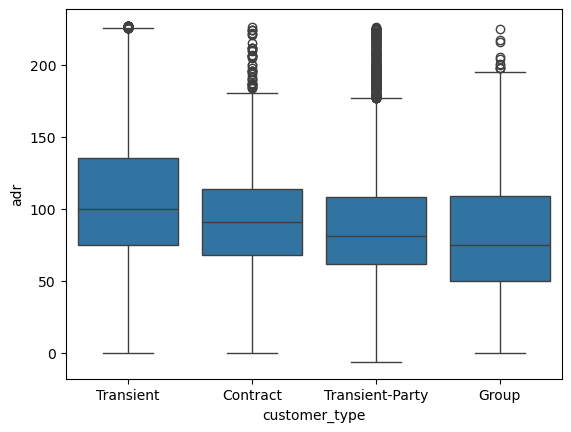

In [390]:
sns.boxplot(x='customer_type', y='adr', data=df)
plt.show()

8. How does booking lead time vary across customer types and countries?

In [393]:
## H0: Average Lead Time is same across all customer types.

mod1 = ols('lead_time ~ customer_type', data=df).fit()
anova_table = sm.stats.anova_lm(mod1)
print(anova_table)

                    df        sum_sq       mean_sq           F  PR(>F)
customer_type      3.0  1.846668e+07  6.155560e+06  850.547375     0.0
Residual       84586.0  6.121637e+08  7.237175e+03         NaN     NaN


In [395]:
print(pairwise_tukeyhsd(endog=df['lead_time'],groups=df['customer_type']))

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1       group2     meandiff p-adj   lower    upper   reject
------------------------------------------------------------------
 Contract           Group -56.8508    0.0 -67.0823 -46.6194   True
 Contract       Transient -35.7896    0.0 -39.7794 -31.7999   True
 Contract Transient-Party   3.8236 0.1158  -0.5861   8.2332  False
    Group       Transient  21.0612    0.0  11.5671  30.5552   True
    Group Transient-Party  60.6744    0.0  50.9964  70.3524   True
Transient Transient-Party  39.6132    0.0  37.3996  41.8268   True
------------------------------------------------------------------


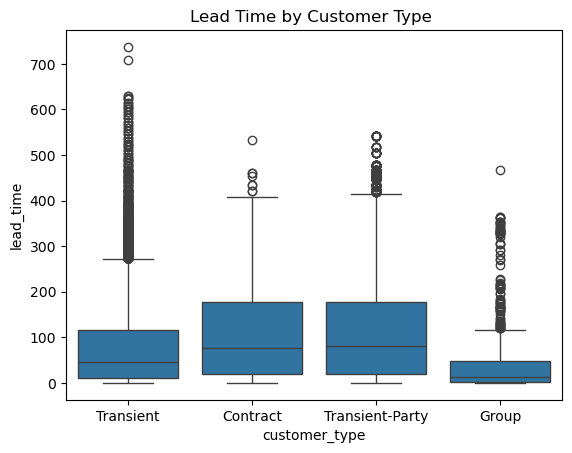

In [397]:
sns.boxplot(x=df['customer_type'],y=df['lead_time'])
plt.title('Lead Time by Customer Type ')
plt.show()

In [399]:
## H0: Average Lead Time is same across all countries.

mod1 = ols('lead_time ~ country', data=df).fit()
anova_table = sm.stats.anova_lm(mod1)
print(anova_table)

               df        sum_sq        mean_sq          F  PR(>F)
country     174.0  4.344548e+07  249686.674557  35.895508     0.0
Residual  84415.0  5.871849e+08    6955.930975        NaN     NaN


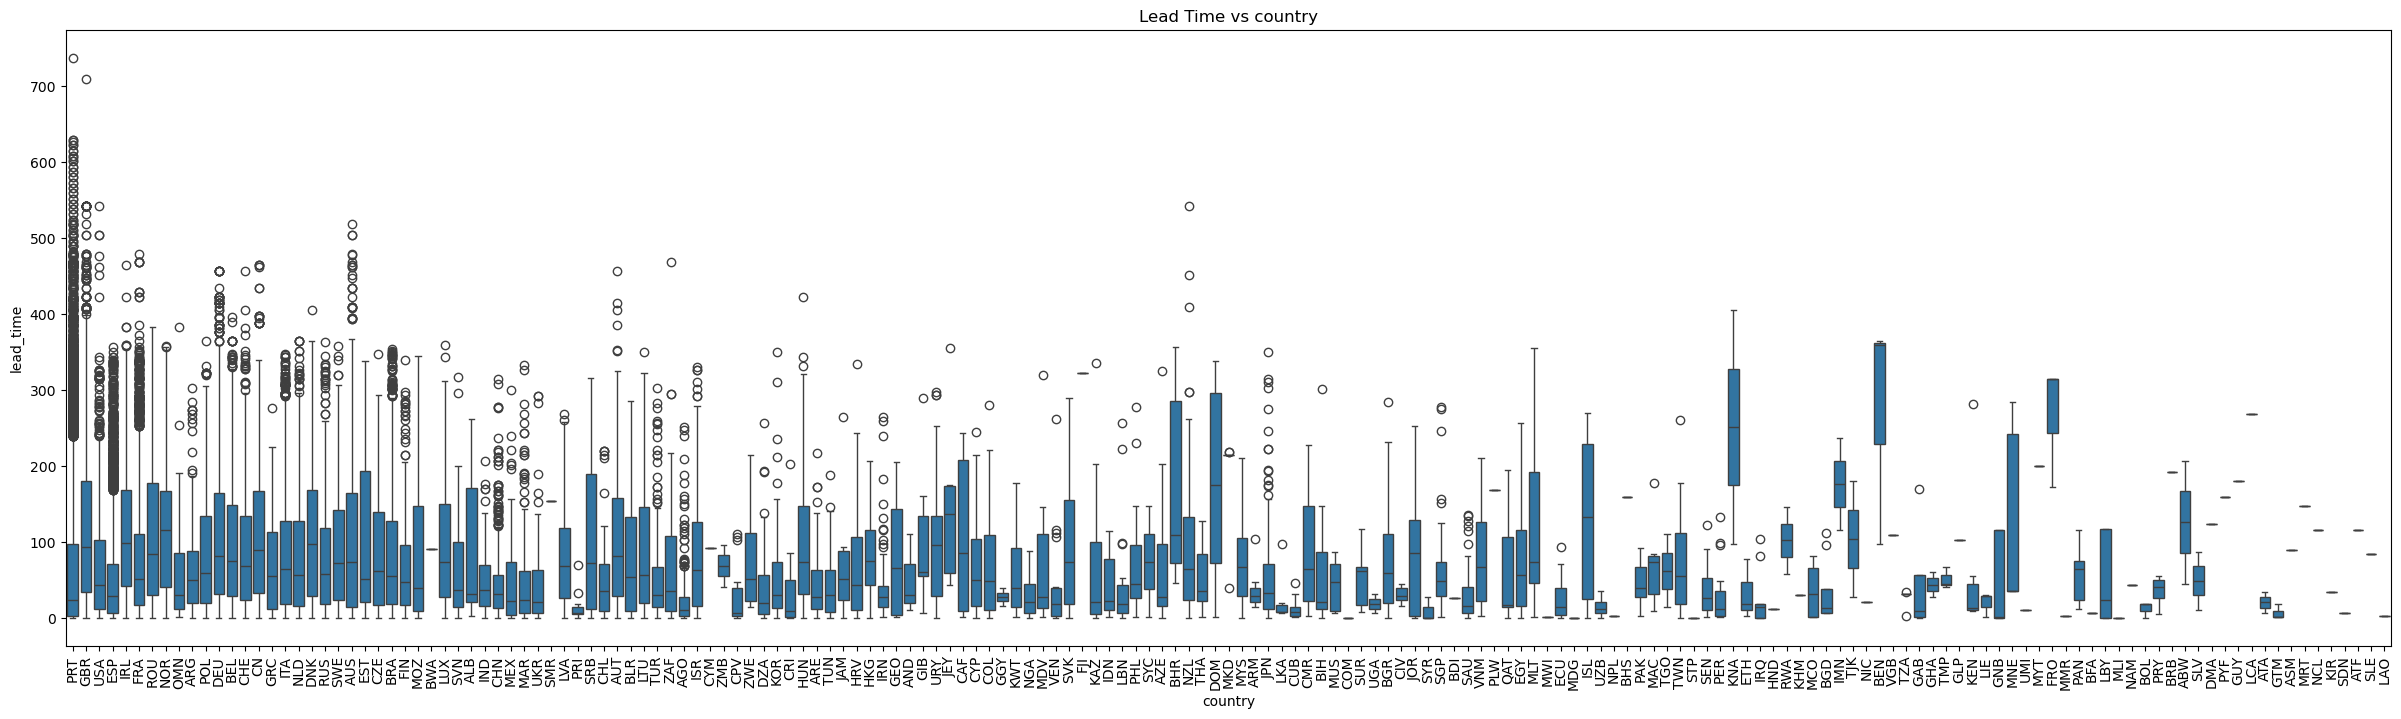

In [400]:
plt.figure(figsize=(30,8))
sns.boxplot(x='country', y='lead_time', data=df)
plt.title('Lead Time vs country')
plt.xticks(rotation=90)
plt.show()

9.	Are longer lead times associated with fewer booking changes or cancellations?

In [402]:
## H0: Lead time and booking changes are not correlated

pearson_corr, p_value = pearsonr(df['lead_time'], df['booking_changes'])
p_value  ## p_value < 0.05, reject Null Hypothesis.

5.362868483746599e-113

In [403]:
## H0: Lead time has no impact on cancellation 

cancelled = df[df['is_canceled'] == 1]['lead_time']
not_cancelled = df[df['is_canceled'] == 0]['lead_time']

t_stat, p_val = ttest_ind(cancelled, not_cancelled, equal_var=False)
p_value  ## p_value < 0.05, reject Null Hypothesis.

5.362868483746599e-113

10.	What is the typical duration of stay, and how does it vary by customer type or segment?

In [409]:
print("Mean stay duration:", df['stay_duration'].mean())
print("Median stay duration:", df['stay_duration'].median())

Mean stay duration: 3.619115734720416
Median stay duration: 3.0


In [411]:
## Stay Duration by Customer Type

df.groupby('customer_type')['stay_duration'].agg(['mean', 'median', 'count'])

,mean,median,count
customer_type,,,
Contract,6.037309,5.0,3136
Group,2.941948,2.0,534
Transient,3.558470,3.0,69583
Transient-Party,3.354327,3.0,11337


In [413]:
## Stay Duration by Market Segment

df.groupby('market_segment')['stay_duration'].agg(['mean', 'median', 'count'])

,mean,median,count
market_segment,,,
Aviation,3.572687,2.0,227
Complementary,1.672884,1.0,697
Corporate,2.049067,1.0,4178
Direct,3.165515,2.0,11147
Groups,3.474937,3.0,4788
Offline TA/TO,4.721215,4.0,13731
Online TA,3.589904,3.0,49820
Undefined,1.500000,1.5,2


11.	How often are guests upgraded or reassigned to a different room type?

In [416]:
room_change_counts = df['room_mismatch'].value_counts()
print(room_change_counts)


room_mismatch
0    71894
1    12696
Name: count, dtype: int64


In [418]:
room_change_pct = df['room_mismatch'].value_counts(normalize=True) * 100
print(room_change_pct)


room_mismatch
0    84.991134
1    15.008866
Name: proportion, dtype: float64


12.	Are guests who make special requests more likely to experience booking changes or longer stays?

In [421]:
# Guests with and without special requests

with_req = df[df['total_of_special_requests'] > 0]
without_req = df[df['total_of_special_requests'] == 0]

## H0: Special requests do not impact number of booking changes.

t_stat, p_value1 = ttest_ind(with_req['booking_changes'], without_req['booking_changes'], equal_var=False)
print(p_value1)

## H0: Special requests do not impact stay duration.

t_stat, p_value2 = ttest_ind(with_req['stay_duration'], without_req['stay_duration'], equal_var=False)
print(p_value2)

0.02034990875857292
5.540099334342735e-18


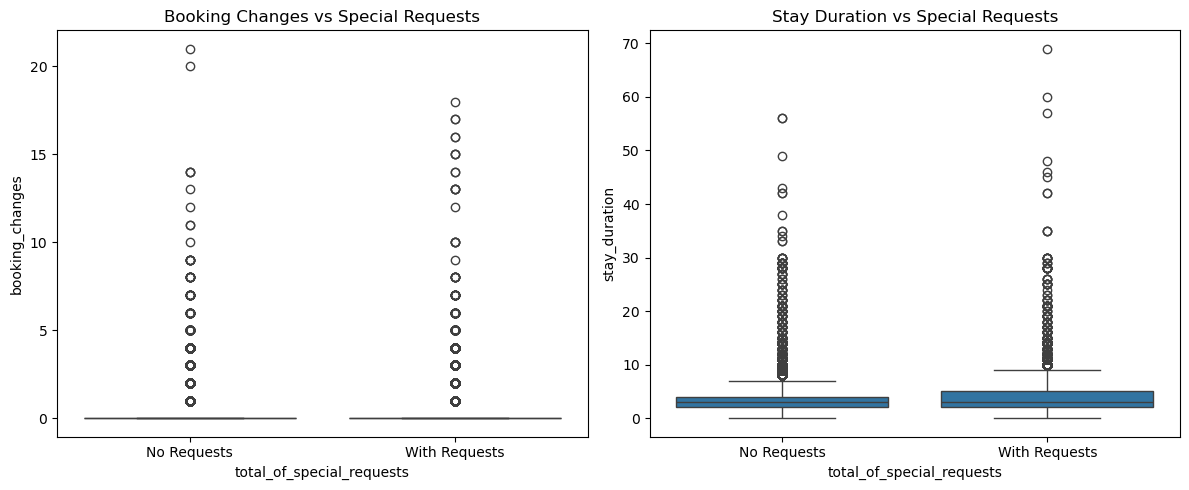

In [423]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=(df['total_of_special_requests'] > 0), y='booking_changes', data=df)
plt.xticks([0,1], ['No Requests', 'With Requests'])
plt.title('Booking Changes vs Special Requests')

plt.subplot(1,2,2)
sns.boxplot(x=(df['total_of_special_requests'] > 0), y='stay_duration', data=df)
plt.xticks([0,1], ['No Requests', 'With Requests'])
plt.title('Stay Duration vs Special Requests')

plt.tight_layout()
plt.show()

13.	Do certain market segments or distribution channels show higher booking consistency or revenue?

In [426]:
# Booking consistency by market segment

booking_consistency = df.groupby('market_segment')['booking_changes'].mean().sort_values(ascending=False)
booking_consistency

market_segment
Groups           0.644110
Direct           0.400825
Corporate        0.358545
Complementary    0.337159
Aviation         0.255507
Offline TA/TO    0.229554
Online TA        0.205680
Undefined        0.000000
Name: booking_changes, dtype: float64

In [428]:
# Revenue by market segment

revenue_by_segment = df.groupby('market_segment')['adr'].mean().sort_values(ascending=False)
revenue_by_segment

market_segment
Online TA        113.212484
Direct           108.244253
Aviation         100.170396
Offline TA/TO     80.650532
Groups            73.731147
Corporate         68.009107
Undefined         15.000000
Complementary      3.071119
Name: adr, dtype: float64

In [430]:
# Booking consistency by channel

booking_consistency_channel = df.groupby('distribution_channel')['booking_changes'].mean().sort_values(ascending=False)
booking_consistency_channel

distribution_channel
Corporate    0.428515
Direct       0.417574
TA/TO        0.230057
GDS          0.099448
Undefined    0.000000
Name: booking_changes, dtype: float64

In [432]:
# Revenue by channel

revenue_by_channel = df.groupby('distribution_channel')['adr'].mean().sort_values(ascending=False)
revenue_by_channel

distribution_channel
GDS          120.317845
TA/TO        104.465252
Direct       101.115152
Corporate     68.375532
Undefined     46.240000
Name: adr, dtype: float64

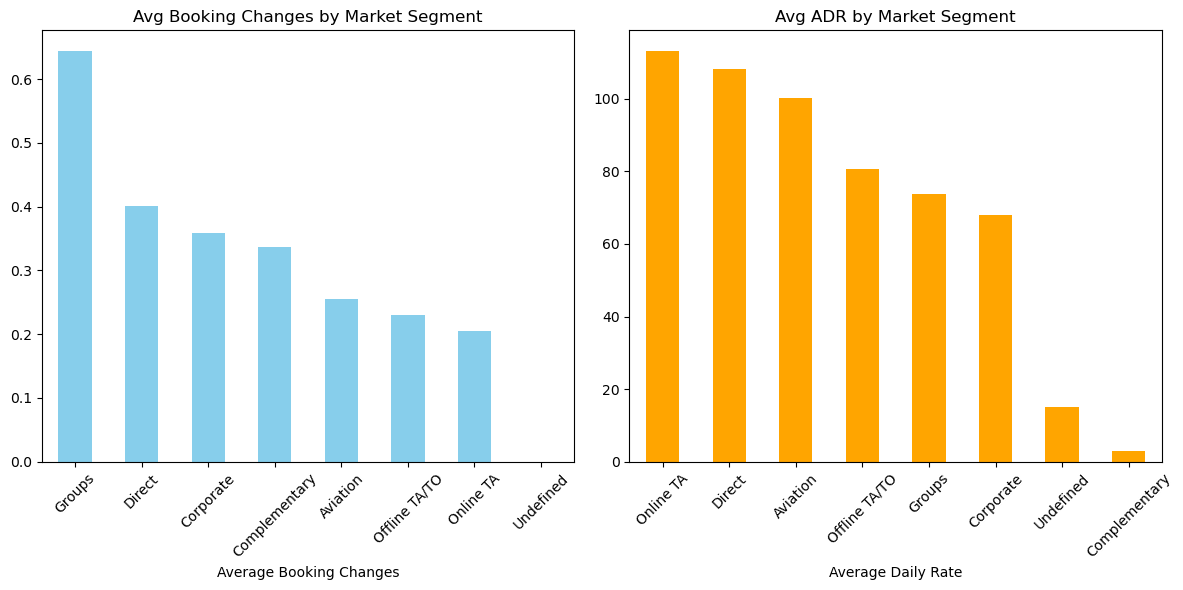

In [434]:
## Market Segment

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
booking_consistency.plot(kind='bar', color='skyblue')
plt.title("Avg Booking Changes by Market Segment")
plt.xlabel("Average Booking Changes")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
revenue_by_segment.plot(kind='bar', color='orange')
plt.title("Avg ADR by Market Segment")
plt.xlabel("Average Daily Rate")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

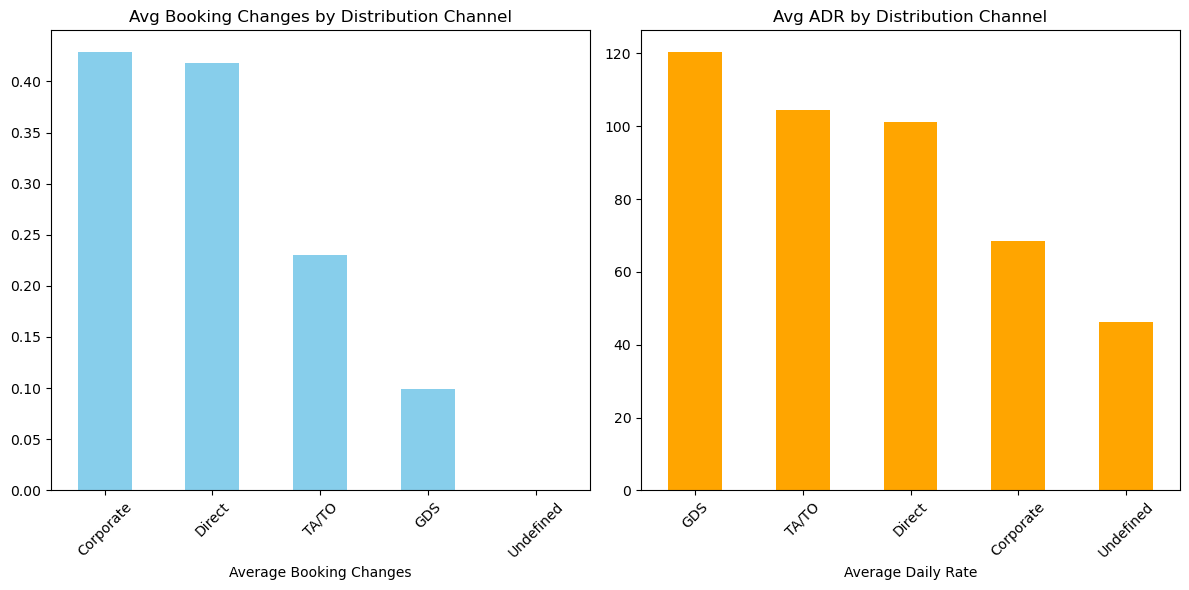

In [436]:
## Dstribution Channel

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
booking_consistency_channel.plot(kind='bar', color='skyblue')
plt.title("Avg Booking Changes by Distribution Channel")
plt.xlabel("Average Booking Changes")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
revenue_by_channel.plot(kind='bar', color='orange')
plt.title("Avg ADR by Distribution Channel")
plt.xlabel("Average Daily Rate")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

14.	What factors are most strongly associated with higher ADR?

In [439]:
## Numerical

numerical_cols = ['lead_time', 'booking_changes', 'adults', 'children', 
                  'stay_duration', 'total_of_special_requests']

# Correlation with ADR

correlations = df[numerical_cols + ['adr']].corr()['adr'].sort_values(ascending=False)
print(correlations)

adr                          1.000000
children                     0.258634
adults                       0.258366
total_of_special_requests    0.152206
stay_duration                0.046798
lead_time                    0.040944
booking_changes             -0.013127
Name: adr, dtype: float64


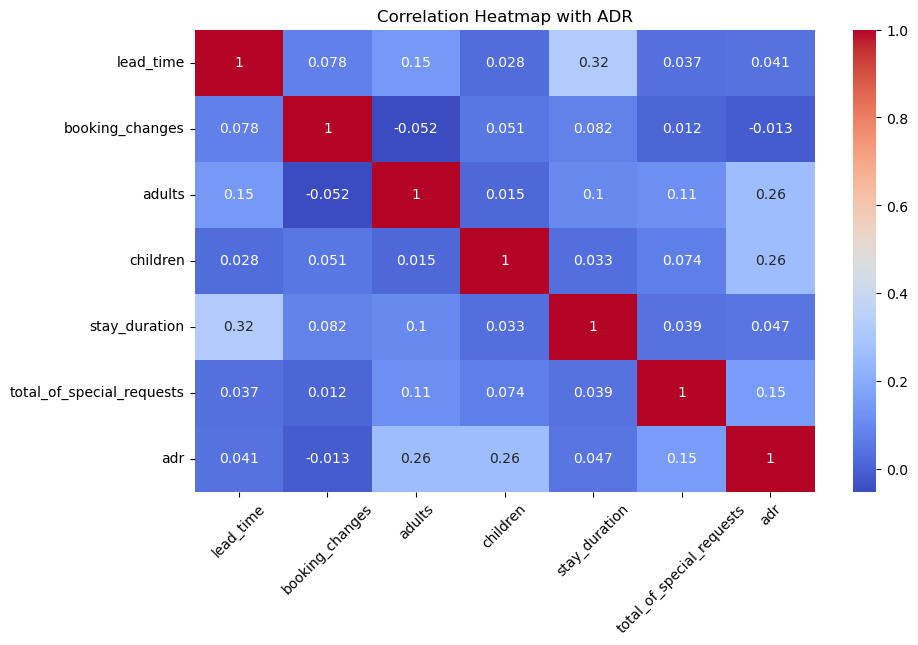

In [441]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_cols + ['adr']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap with ADR")
plt.xticks(rotation=45)
plt.show()

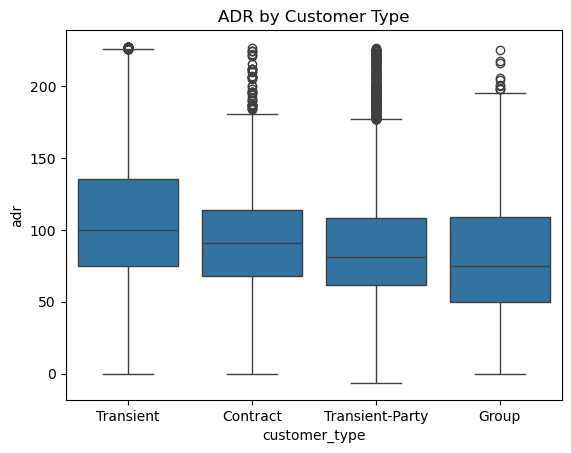

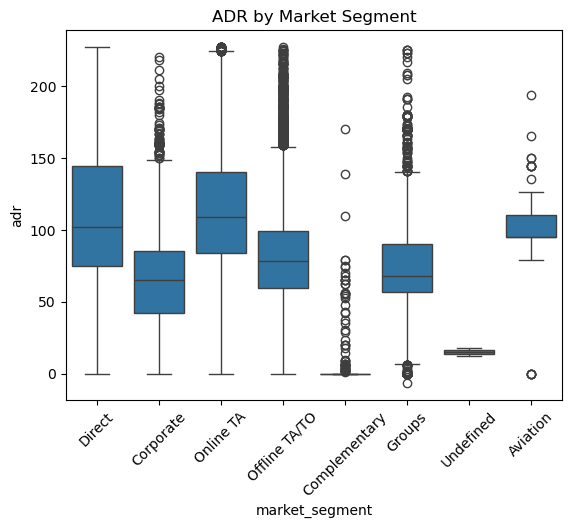

In [443]:
## Categorical

sns.boxplot(data=df, x='customer_type', y='adr')
plt.title("ADR by Customer Type")
plt.show()

sns.boxplot(data=df, x='market_segment', y='adr')
plt.title("ADR by Market Segment")
plt.xticks(rotation=45)
plt.show()

15.	Are there customer types or segments consistently contributing to higher revenue?

In [446]:
## evenue = adr * stay_duration

df['revenue'] = df['adr'] * df['stay_duration']

# Revenue by customer_type
revenue_by_customer_type = df.groupby('customer_type')['revenue'].mean().sort_values(ascending=False)
revenue_by_customer_type

customer_type
Contract           522.910418
Transient          383.160483
Transient-Party    286.415103
Group              245.607228
Name: revenue, dtype: float64

In [448]:
# Revenue by market_segment

revenue_by_segment = df.groupby('market_segment')['revenue'].mean().sort_values(ascending=False)
revenue_by_segment

market_segment
Online TA        408.895016
Offline TA/TO    387.912884
Direct           368.417065
Aviation         365.785727
Groups           249.972586
Corporate        141.262346
Undefined         24.000000
Complementary      7.280516
Name: revenue, dtype: float64

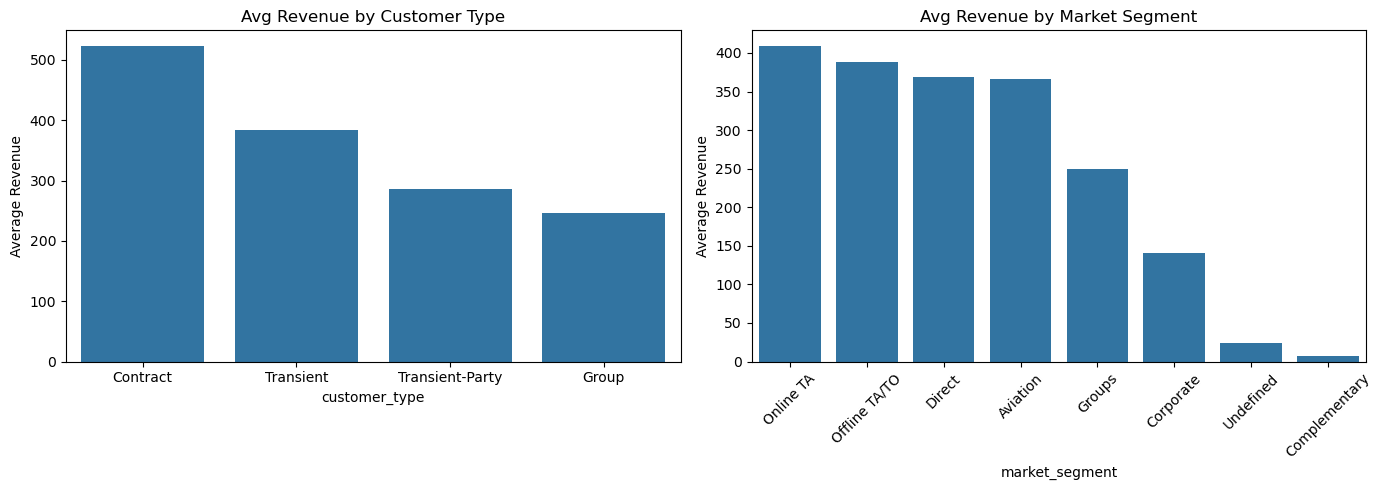

In [450]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.barplot(x=revenue_by_customer_type.index, y=revenue_by_customer_type.values)
plt.title('Avg Revenue by Customer Type')
plt.ylabel('Average Revenue')

plt.subplot(1,2,2)
sns.barplot(x=revenue_by_segment.index, y=revenue_by_segment.values)
plt.title('Avg Revenue by Market Segment')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


16.	Do bookings with more lead time or from specific countries yield higher ADR?

In [453]:
corr = df['lead_time'].corr(df['adr'])
print(f"Correlation between lead time and ADR: {corr:.3f}")

Correlation between lead time and ADR: 0.041


In [455]:
top_countries = df['country'].value_counts().nlargest(10).index

adr_by_country = df[df['country'].isin(top_countries)].groupby('country')['adr'].mean().sort_values(ascending=False)
print(adr_by_country)


country
BEL    112.896047
ESP    112.789589
ITA    112.758895
BRA    109.974422
FRA    109.381163
NLD    106.702790
DEU    104.594245
IRL     98.740792
GBR     94.960175
PRT     89.778918
Name: adr, dtype: float64


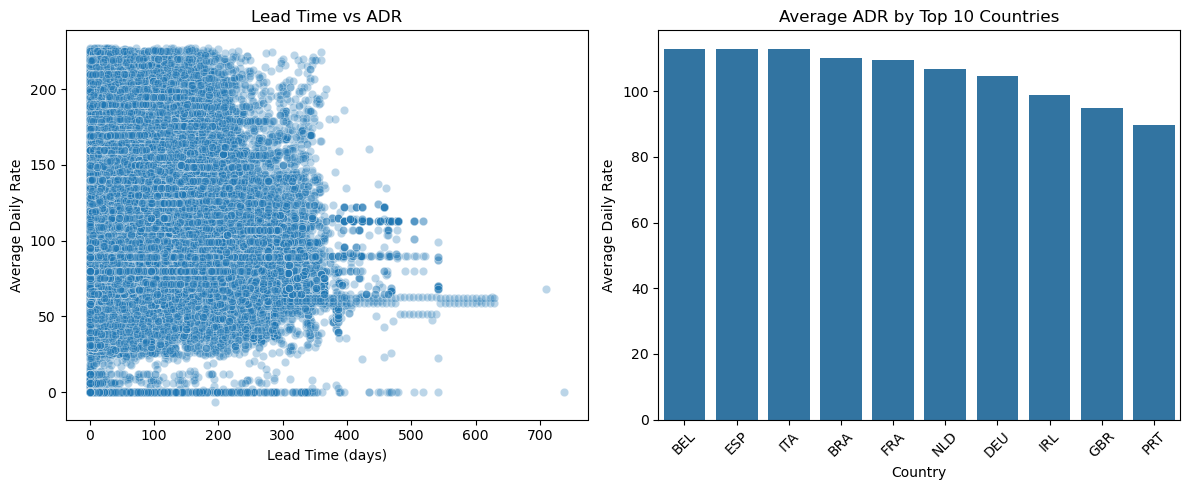

In [457]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x='lead_time', y='adr', data=df, alpha=0.3)
plt.title('Lead Time vs ADR')
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Daily Rate')

plt.subplot(1,2,2)
sns.barplot(x=adr_by_country.index, y=adr_by_country.values)
plt.title('Average ADR by Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Average Daily Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


17.	Are guests with higher ADR more likely to request special services or make booking modifications?

In [460]:
print("Correlation of ADR with total special requests:", df['adr'].corr(df['total_of_special_requests']))
print("Correlation of ADR with booking changes:", df['adr'].corr(df['booking_changes']))

Correlation of ADR with total special requests: 0.15220562963449932
Correlation of ADR with booking changes: -0.01312707806047411


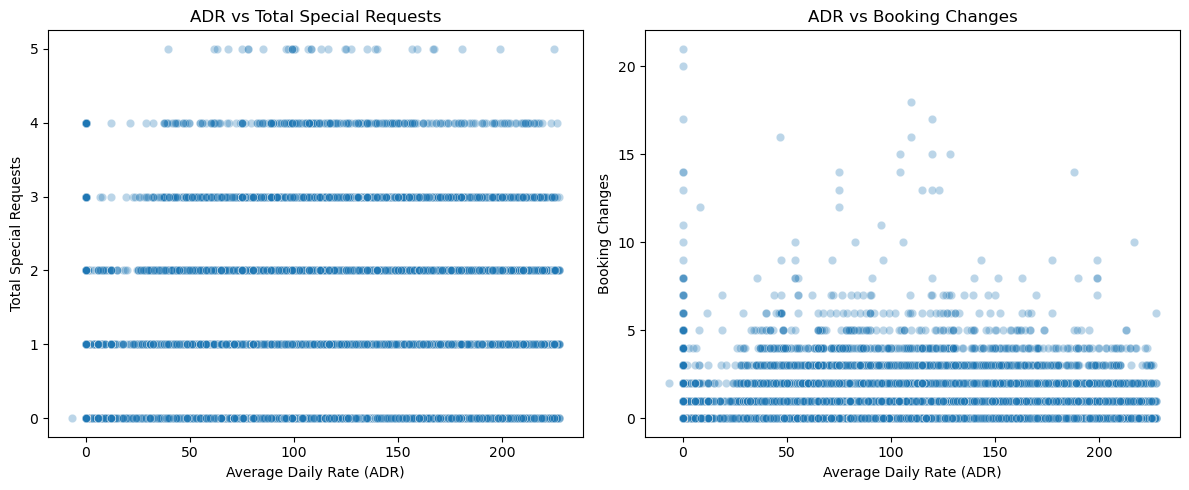

In [462]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x='adr', y='total_of_special_requests', data=df, alpha=0.3)
plt.title('ADR vs Total Special Requests')
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Total Special Requests')

plt.subplot(1,2,2)
sns.scatterplot(x='adr', y='booking_changes', data=df, alpha=0.3)
plt.title('ADR vs Booking Changes')
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Booking Changes')

plt.tight_layout()
plt.show()


18.	Do guests from different countries behave differently in terms of booking timing or stay length?

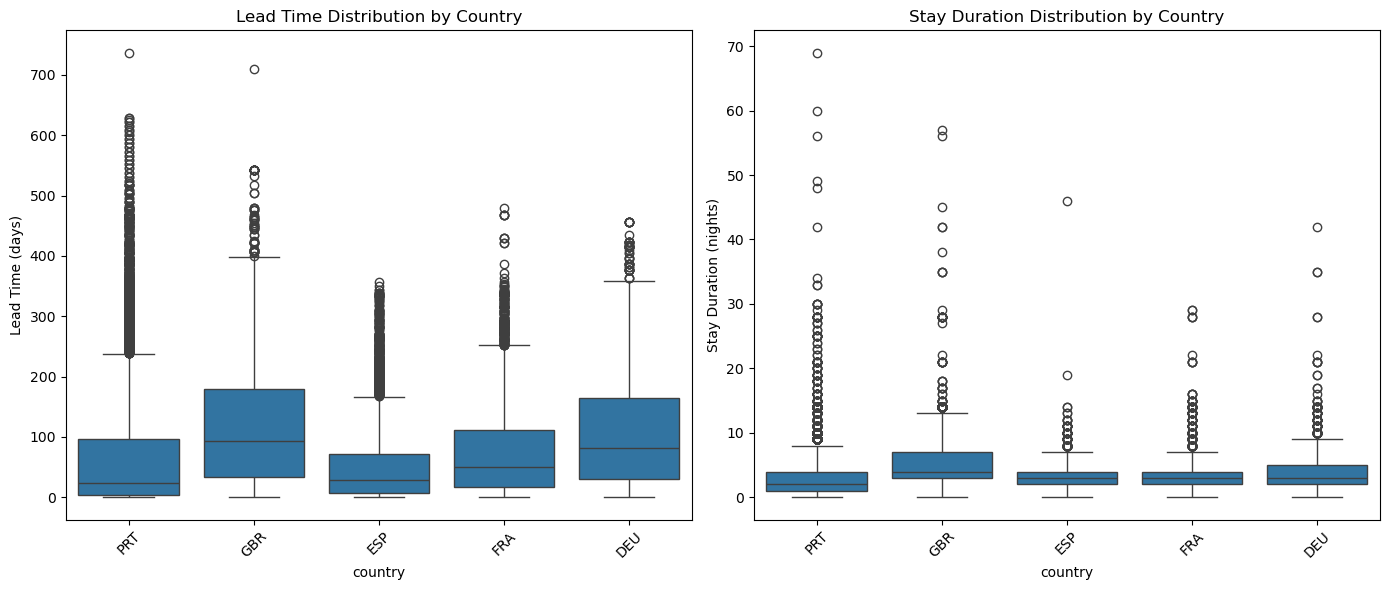

In [465]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(x='country', y='lead_time', data=df_top)
plt.title('Lead Time Distribution by Country')
plt.xticks(rotation=45)
plt.ylabel('Lead Time (days)')

plt.subplot(1,2,2)
sns.boxplot(x='country', y='stay_duration', data=df_top)
plt.title('Stay Duration Distribution by Country')
plt.xticks(rotation=45)
plt.ylabel('Stay Duration (nights)')

plt.tight_layout()
plt.show()


19.	Are guests who make booking changes more likely to request additional services or cancel?

In [468]:
## Create binary column for booking changes

df['booking_changed'] = (df['booking_changes'] > 0).astype(int)

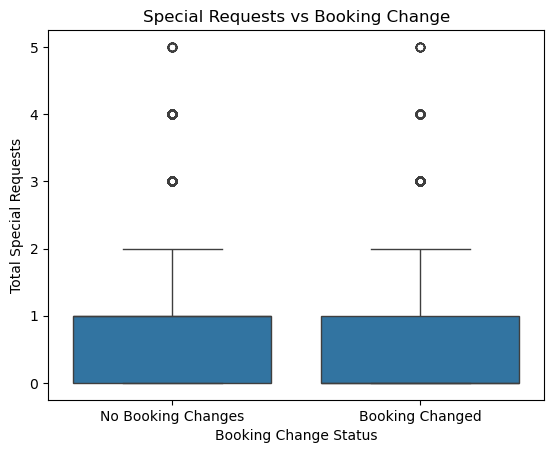

In [470]:
sns.boxplot(x='booking_changed', y='total_of_special_requests', data=df)
plt.xticks([0, 1], ['No Booking Changes', 'Booking Changed'])
plt.xlabel('Booking Change Status')
plt.ylabel('Total Special Requests')
plt.title('Special Requests vs Booking Change')
plt.show()

In [472]:
## H0 : guests who change bookings do make more special requests.

changed = df[df['booking_changed'] == 1]['total_of_special_requests']
not_changed = df[df['booking_changed'] == 0]['total_of_special_requests']

t_stat, p_value = ttest_ind(changed, not_changed, equal_var=False)
print('p-value: ', p_value)

p-value:  0.7438729568483611


In [474]:
## H0 : booking changes are associated with cancellation behavior.

table = pd.crosstab(df['booking_changed'], df['is_canceled'])
chi2, p_chi, dof, expected = chi2_contingency(table)

print("p-value:", p_chi)

p-value: 1.052819974826973e-293
